In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


In [19]:
# Read the data
df = pd.read_csv('datasets/PropertyPrices.csv')


/var/folders/w6/r48h7v_j71v17zq997zw3_yr0000gn/T/ipykernel_20151/3031606086.py:2: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasets/PropertyPrices.csv')


In [20]:
df.head()


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [21]:
# Remove properties with prices that were not full market price and remove rows that contained a small amount of Irish language descriptions of properties.

df = df[df['Not Full Market Price'] == 'No']
df = df.drop('Not Full Market Price', axis=1)
df = df[(df['Description of Property'] == 'Second-Hand Dwelling house /Apartment')
        | (df['Description of Property'] == 'New Dwelling house /Apartment')]


In [22]:
# Look at a subset of the data from 2012 onwards.

df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(
    df['Date of Sale (dd/mm/yyyy)'], dayfirst=True, format='%d/%m/%Y')
df = df.rename(
    columns={'Date of Sale (dd/mm/yyyy)': 'Date of Sale', 'Price ()': 'Price'})
df = df[(df['Date of Sale'] > '2012-01-01')].reset_index(drop=True)


In [23]:
# Parse the price column from strings into floats.

df['Price'] = df['Price'].apply(lambda x: x.lstrip('\x80'))
df['Price'] = df['Price'].apply(lambda x: float(
    x.split()[0].replace(',', ''))).astype(float)


In [24]:
# remove 'Eircode' column as it is not needed for this analysis.
# remove 'VAT Exclusive' column as it is not needed for this analysis.
# remove 'Property Size Description' column as it is not needed for this analysis.

df = df.drop('Eircode', axis=1)
df = df.drop('VAT Exclusive', axis=1)
df = df.drop('Property Size Description', axis=1)


In [25]:
df.head()


,Date of Sale,Address,County,Price,Description of Property
0,2012-01-02,"1 Ballagh Cove, Enniscorthy",Wexford,134000.0,Second-Hand Dwelling house /Apartment
1,2012-01-03,"12 Brookwood Crescent, Artane, Dublin 5",Dublin,90000.0,Second-Hand Dwelling house /Apartment
2,2012-01-03,"12 Larchfield, Kilkenny",Kilkenny,150000.0,Second-Hand Dwelling house /Apartment
3,2012-01-03,"13 Ardshanavooley, Killarney",Kerry,240000.0,Second-Hand Dwelling house /Apartment
4,2012-01-03,"182 Santry Close, Santry",Dublin,360000.0,Second-Hand Dwelling house /Apartment


In [26]:
# if 'Date of Sale' column starts with '2012' then set 'Year' column to 2012, etc.

df['Year'] = df['Date of Sale'].apply(lambda x: x.year)


In [27]:
df.head()


,Date of Sale,Address,County,Price,Description of Property,Year
0,2012-01-02,"1 Ballagh Cove, Enniscorthy",Wexford,134000.0,Second-Hand Dwelling house /Apartment,2012
1,2012-01-03,"12 Brookwood Crescent, Artane, Dublin 5",Dublin,90000.0,Second-Hand Dwelling house /Apartment,2012
2,2012-01-03,"12 Larchfield, Kilkenny",Kilkenny,150000.0,Second-Hand Dwelling house /Apartment,2012
3,2012-01-03,"13 Ardshanavooley, Killarney",Kerry,240000.0,Second-Hand Dwelling house /Apartment,2012
4,2012-01-03,"182 Santry Close, Santry",Dublin,360000.0,Second-Hand Dwelling house /Apartment,2012


<AxesSubplot: title={'center': 'Average Price of a Property in Ireland'}, xlabel='Year'>

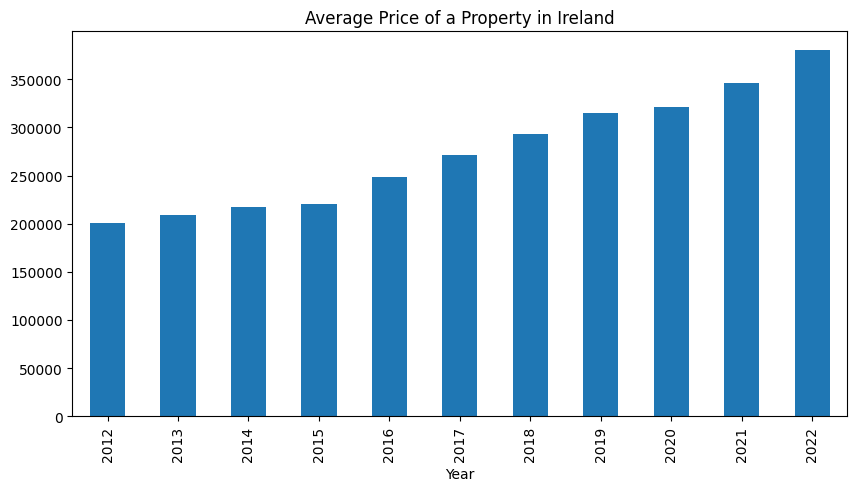

In [28]:
# Plot the average price of a property in each year for the entire country
df.groupby('Year')['Price'].mean().plot(
    kind='bar', title='Average Price of a Property in Ireland', figsize=(10, 5))


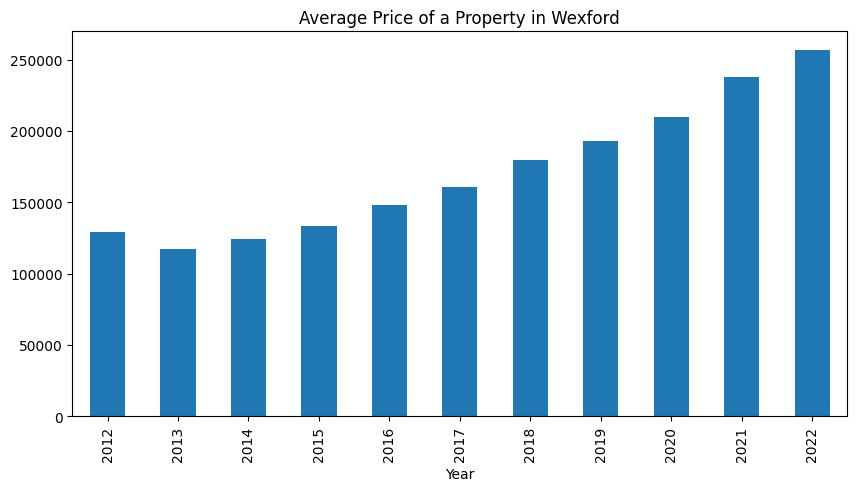

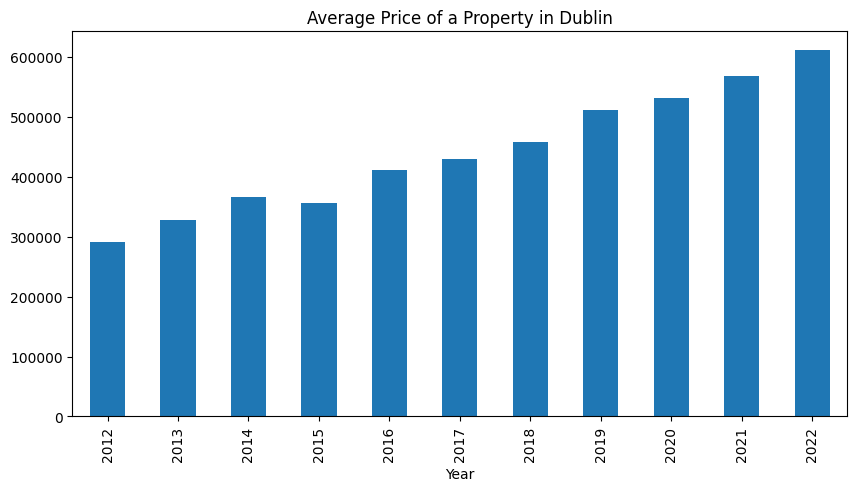

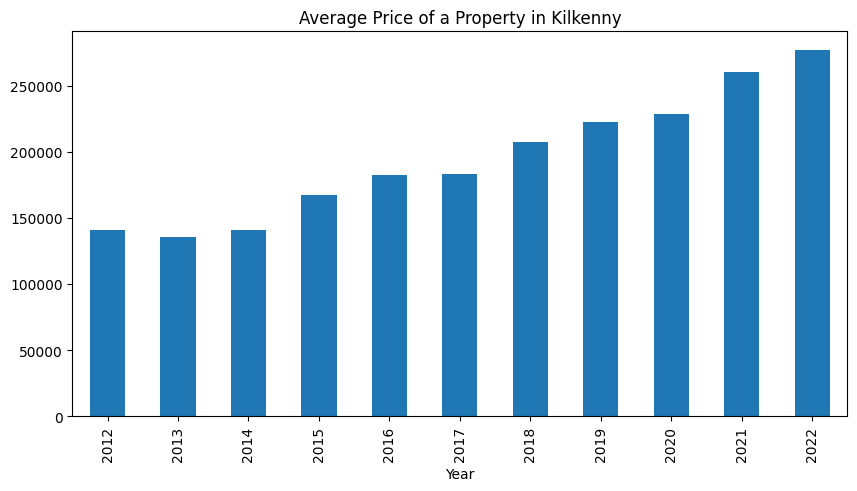

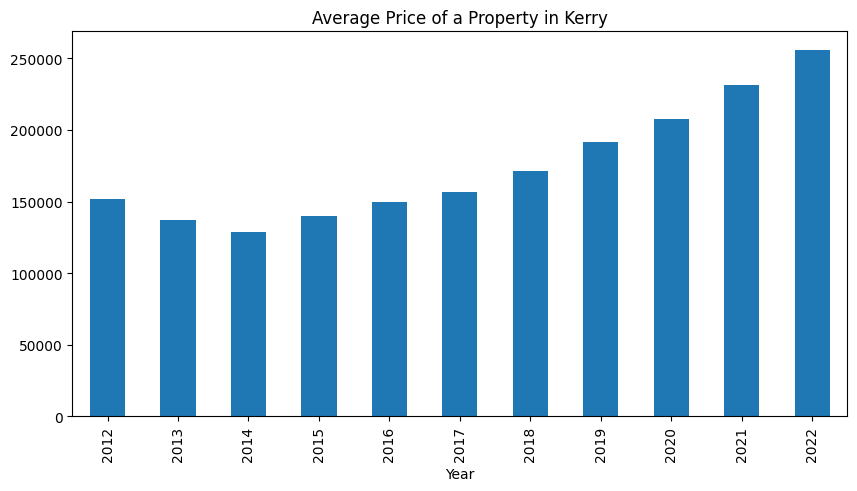

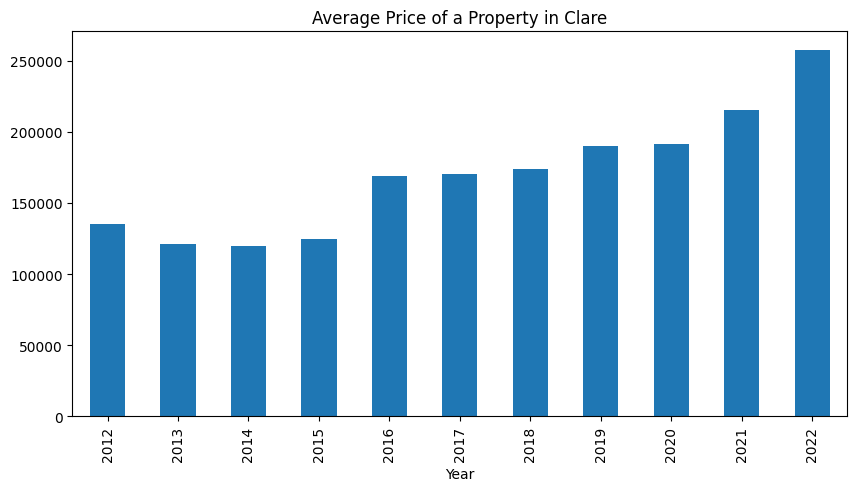

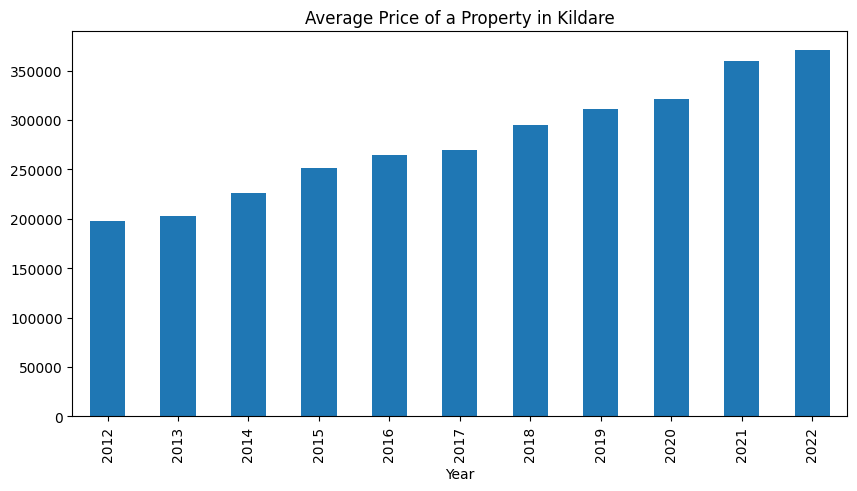

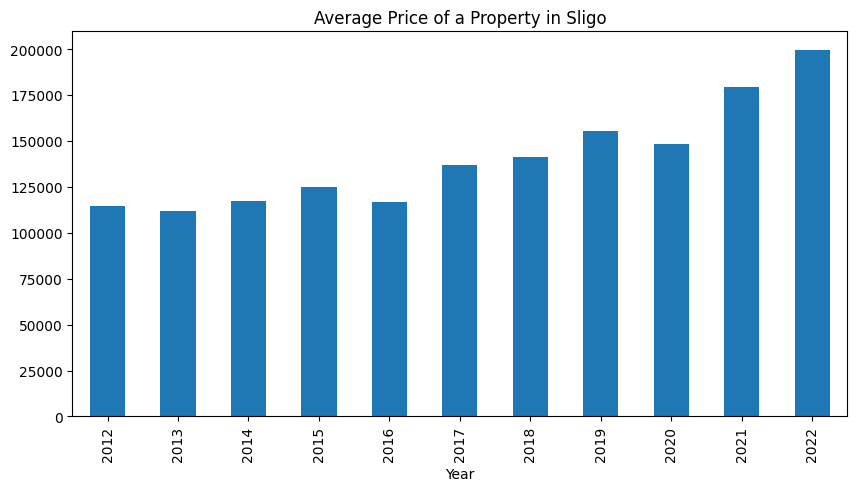

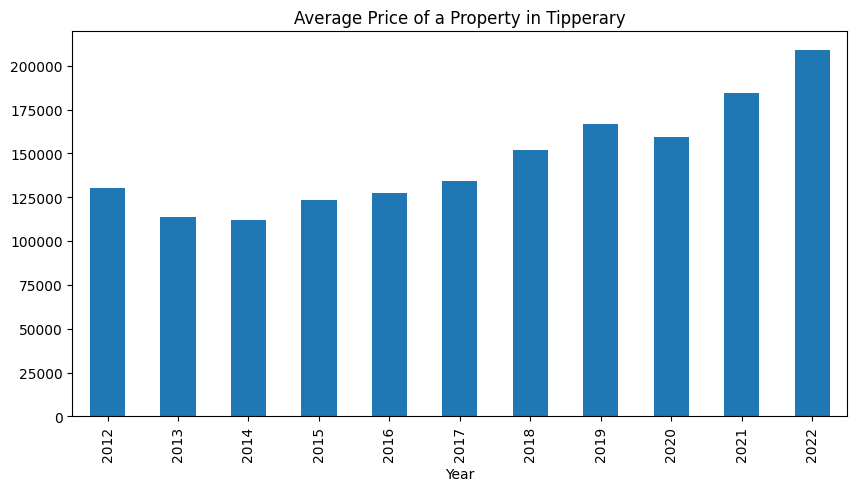

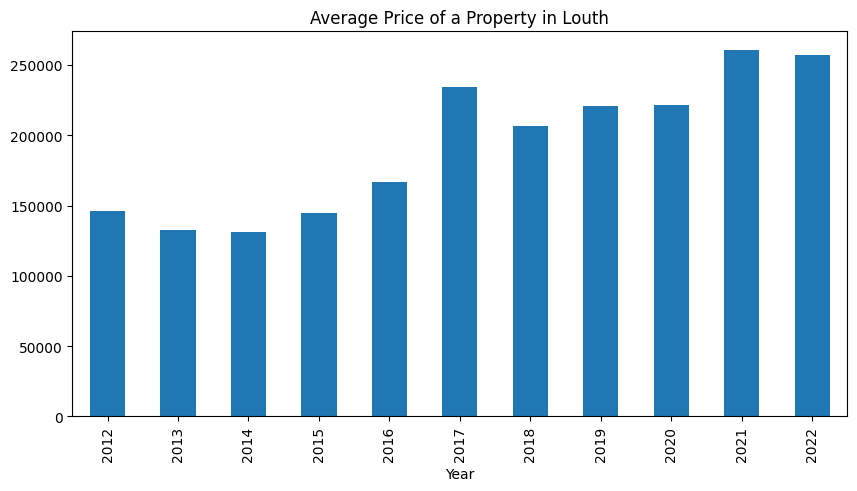

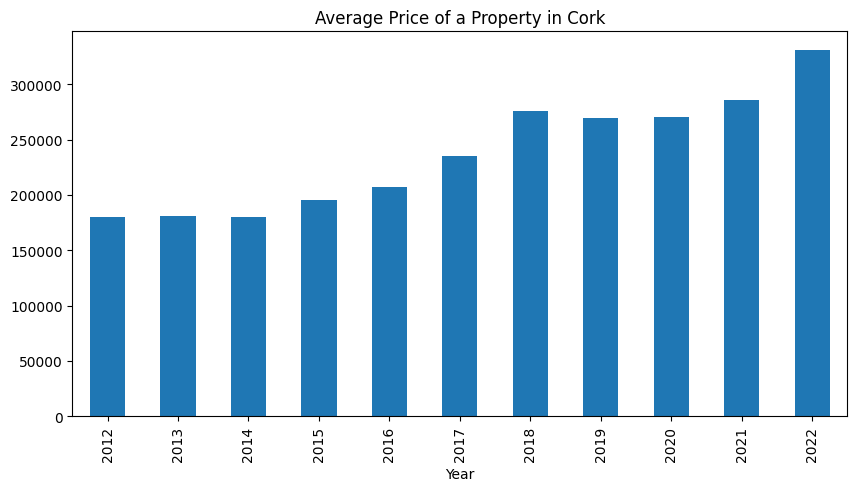

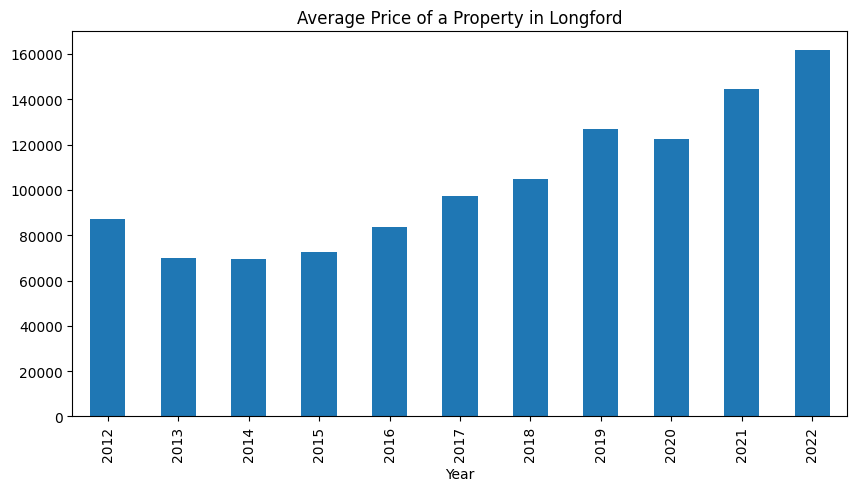

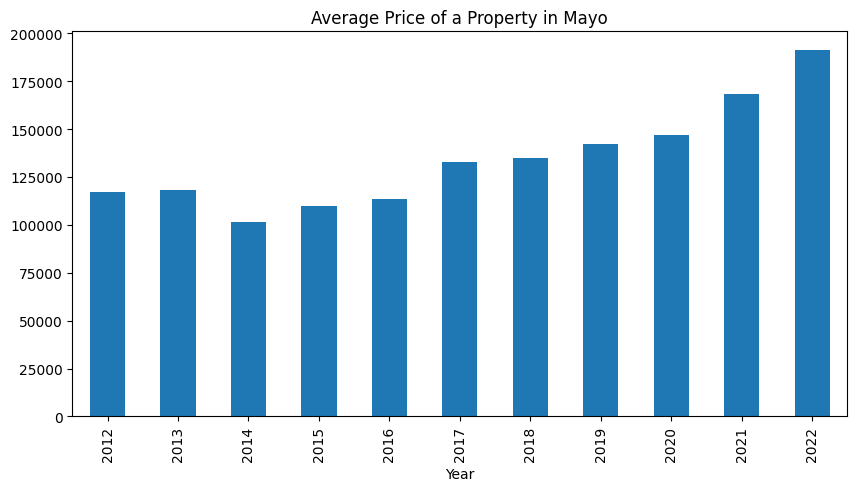

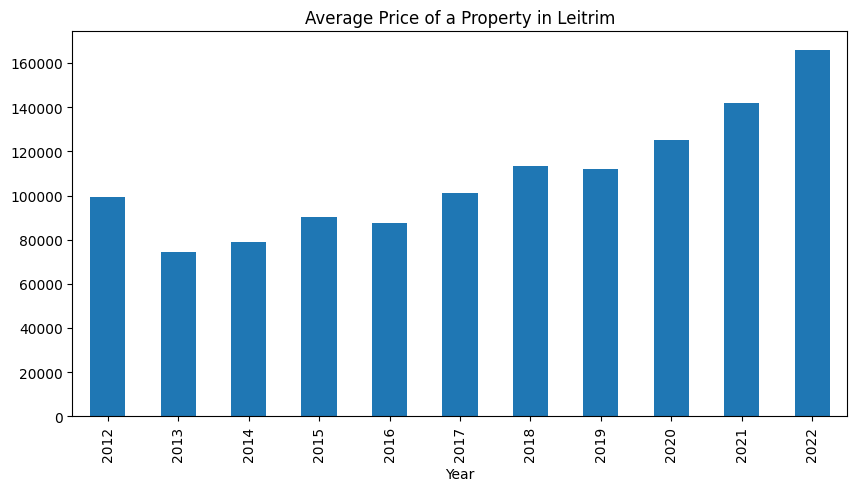

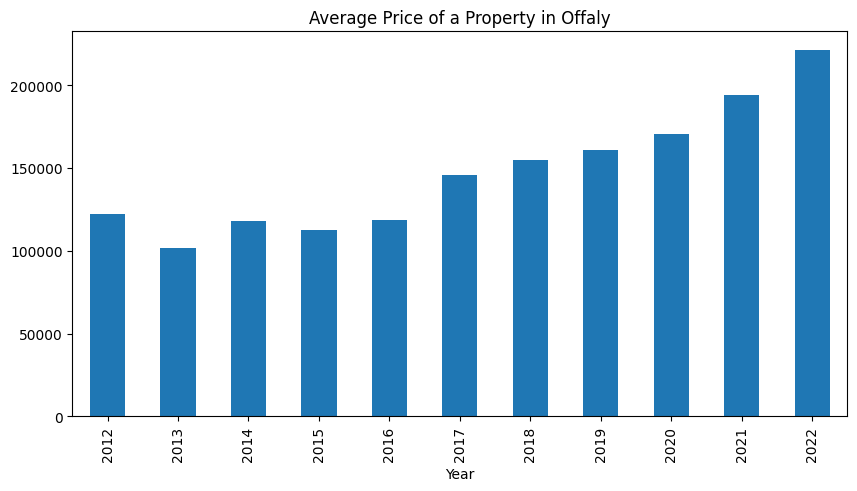

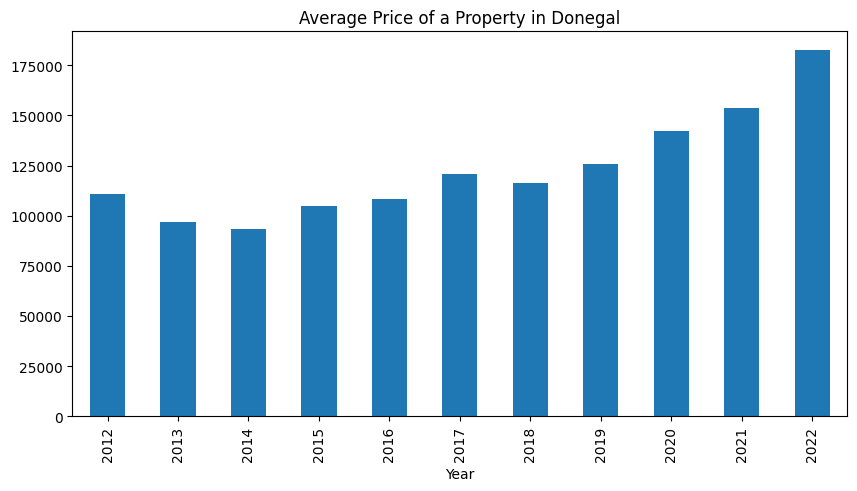

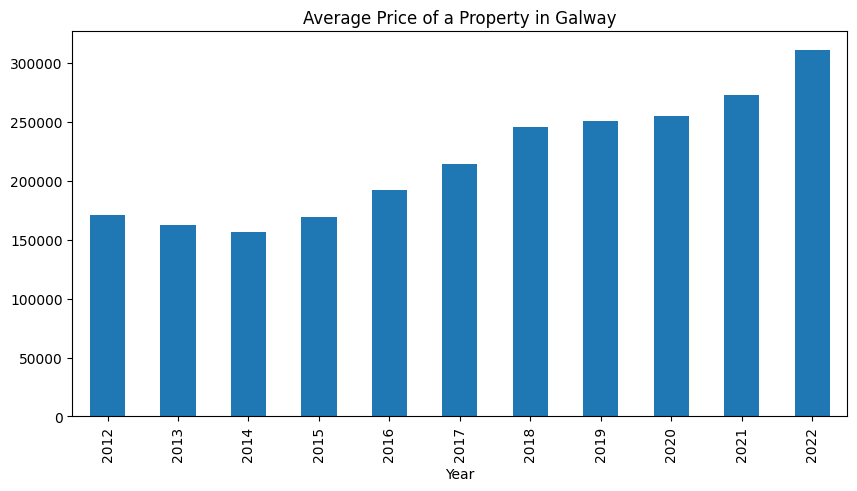

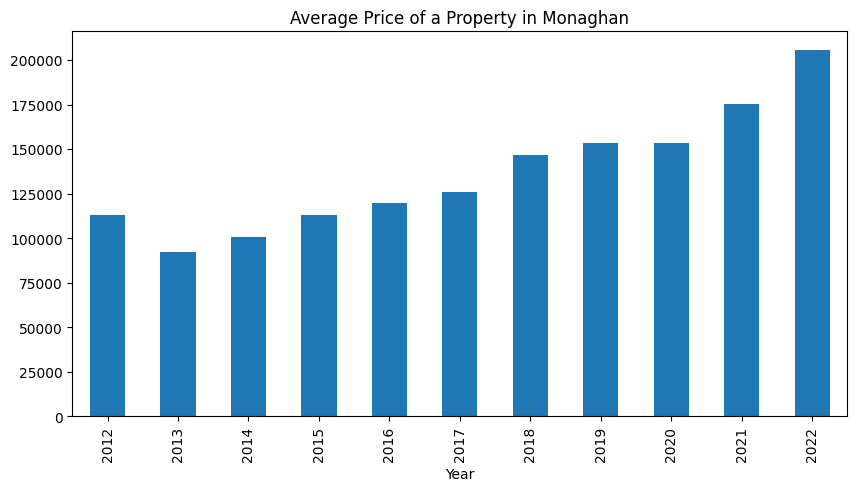

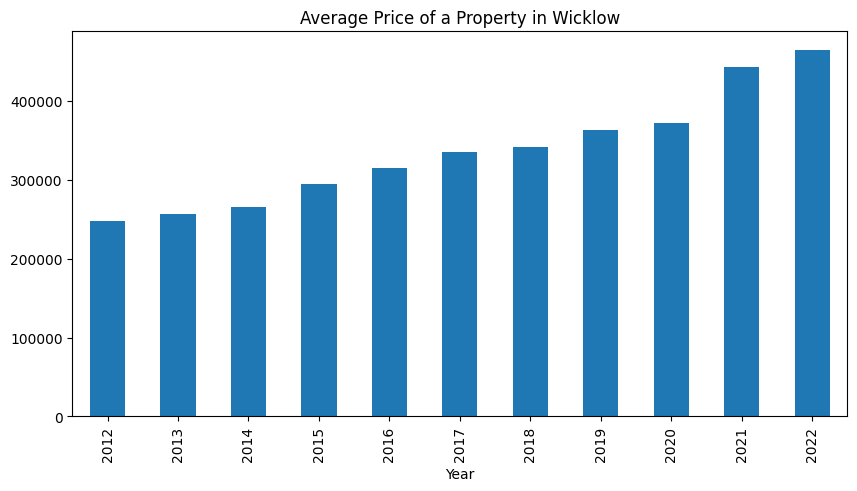

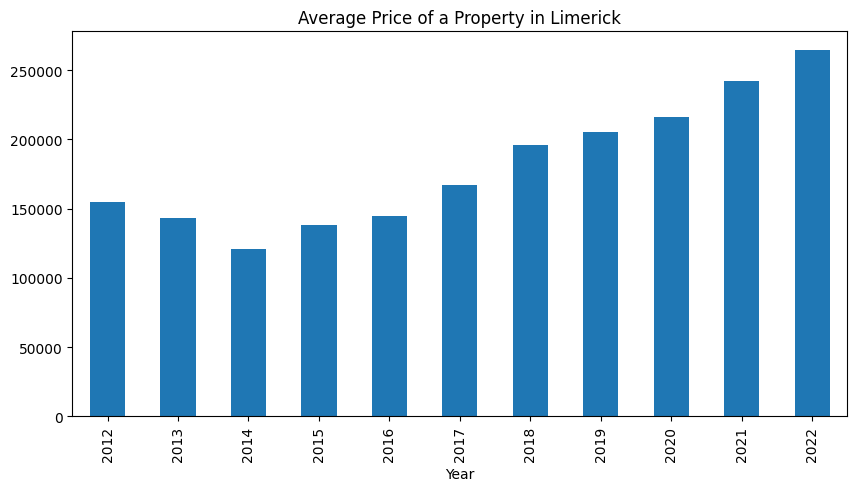

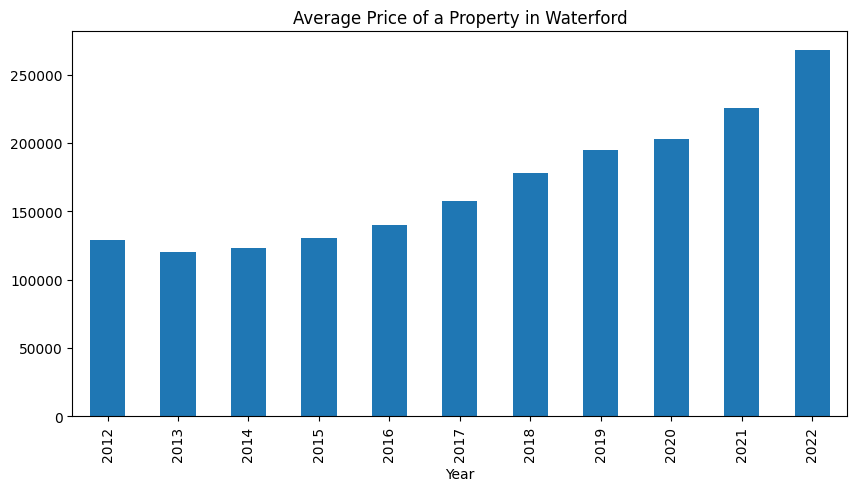

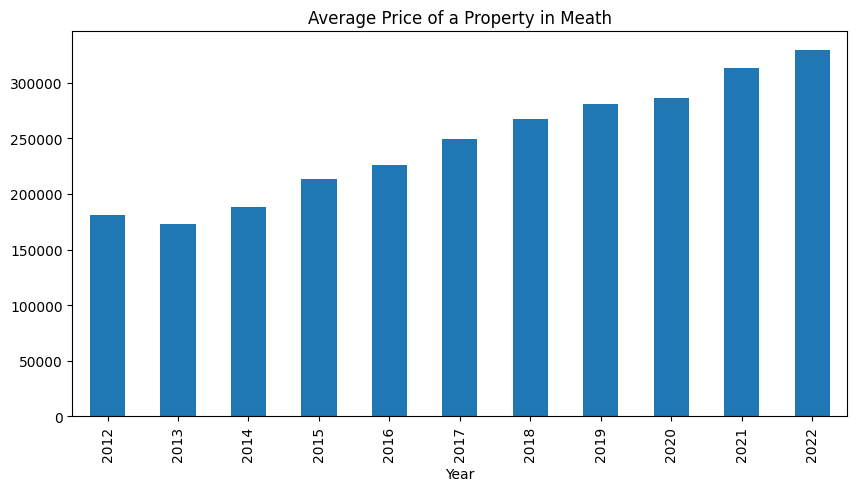

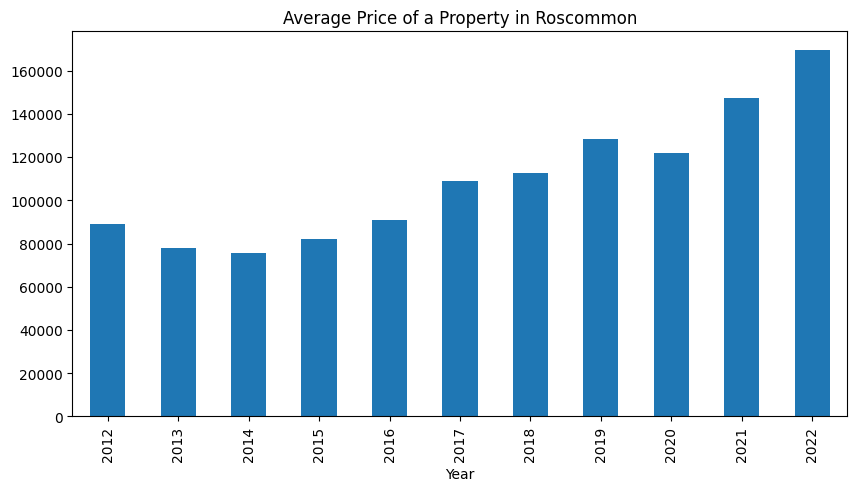

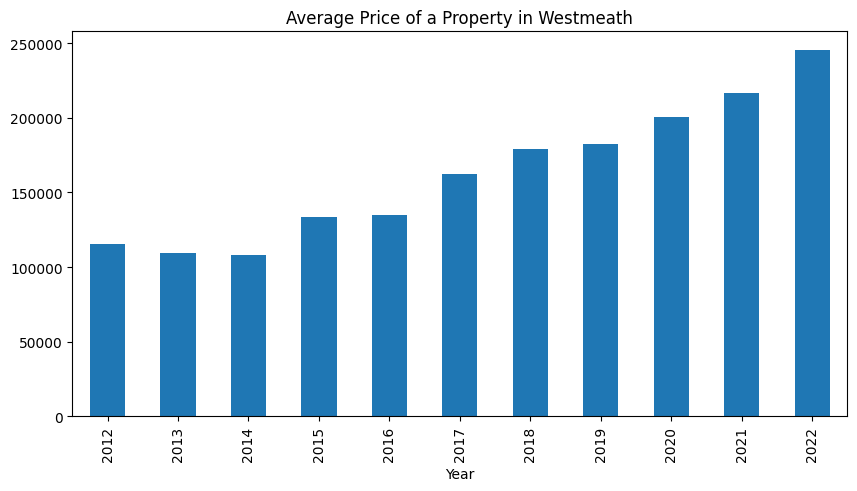

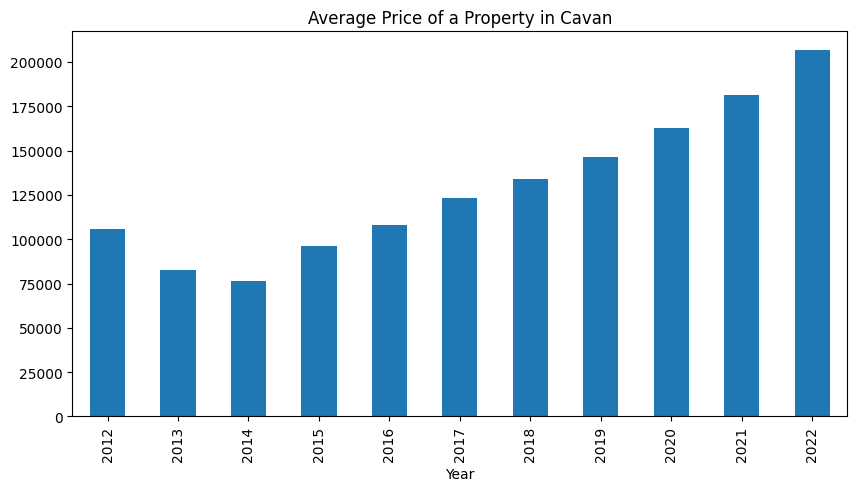

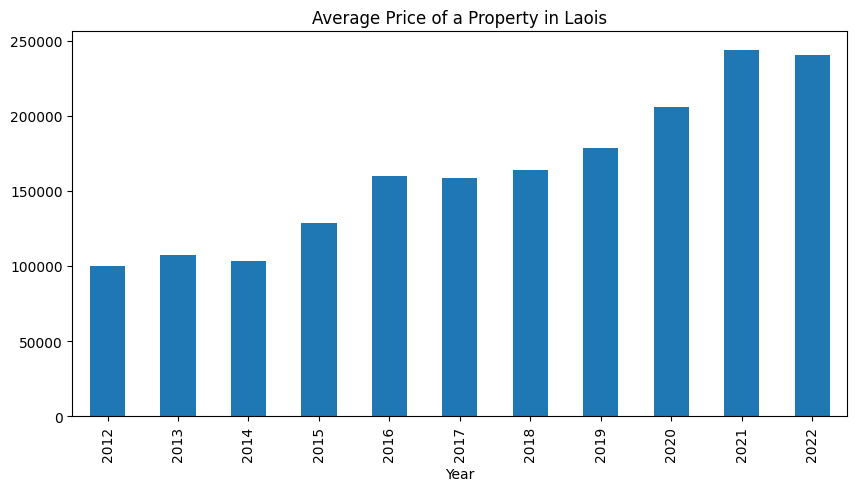

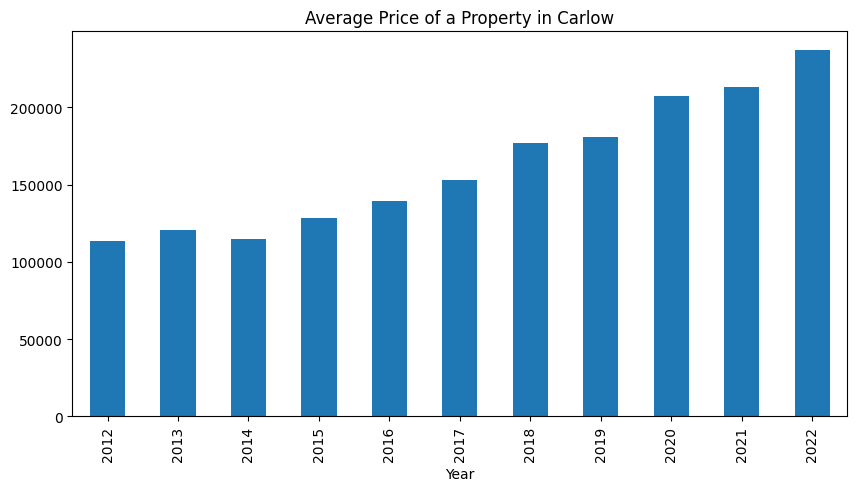

In [29]:
# Loop through each county and plot the average price of a property in each year for that county draw a new graph for each county in the dataset.

for county in df['County'].unique():
    df[df['County'] == county].groupby('Year')['Price'].mean().plot(
        kind='bar', title='Average Price of a Property in {}'.format(county), figsize=(10, 5))
    plt.show()


In [35]:
# which county has the highest average price increase between 2012 and 2022?

df_2012 = df[df['Year'] == 2012]
df_2022 = df[df['Year'] == 2022]

df_2012 = df_2012.groupby('County')['Price'].mean().reset_index()
df_2022 = df_2022.groupby('County')['Price'].mean().reset_index()

df_2012 = df_2012.rename(columns={'Price': 'Price_2012'})
df_2022 = df_2022.rename(columns={'Price': 'Price_2022'})

df_2012_2022 = pd.merge(df_2012, df_2022, on='County')

df_2012_2022['Price Increase'] = df_2012_2022['Price_2022'] - \
    df_2012_2022['Price_2012']

df_2012_2022.sort_values('Price Increase', ascending=False).head(26)

# add column to df_2012_2022 to show the percentage increase in price between 2012 and 2022

df_2012_2022['Percentage Increase'] = (
    df_2012_2022['Price Increase'] / df_2012_2022['Price_2012']) * 100


# format each column to decimal two places

df_2012_2022['Price_2012'] = df_2012_2022['Price_2012'].apply(
    lambda x: '{:.2f}'.format(x))


df_2012_2022.sort_values('Percentage Increase', ascending=False).head(26)



,County,Price_2012,Price_2022,Price Increase,Percentage Increase
10,Laois,100003.89,240249.451637,140245.557617,140.240097
23,Westmeath,115194.72,245562.319633,130367.596986,113.171501
5,Dublin,291987.94,611947.773983,319959.832122,109.579810
0,Carlow,113523.29,237118.764569,123595.475618,108.872353
22,Waterford,128973.77,268265.124447,139291.349922,107.999747
24,Wexford,128896.02,256884.301495,127988.284577,99.295764
9,Kilkenny,140767.94,277064.627881,136296.685826,96.823669
1,Cavan,105927.95,206876.251318,100948.296366,95.299014
2,Clare,134954.89,257651.862026,122696.970889,90.917024
19,Roscommon,88909.23,169626.590570,80717.359215,90.786252


<AxesSubplot: title={'center': 'Average Price Increase of a Property in Ireland'}, xlabel='County'>

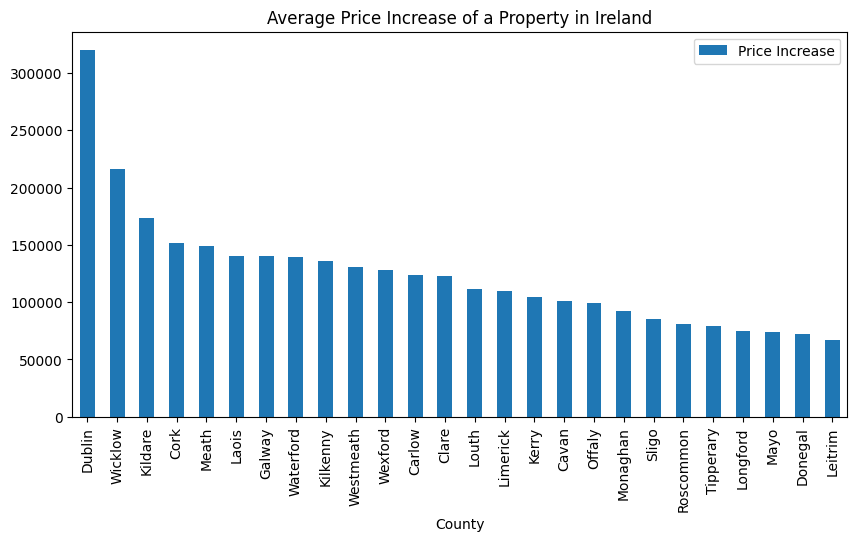

In [31]:
# plot the data

df_2012_2022.sort_values('Price Increase', ascending=False).plot(kind='bar', x='County',
                                                                 y='Price Increase', title='Average Price Increase of a Property in Ireland', figsize=(10, 5))


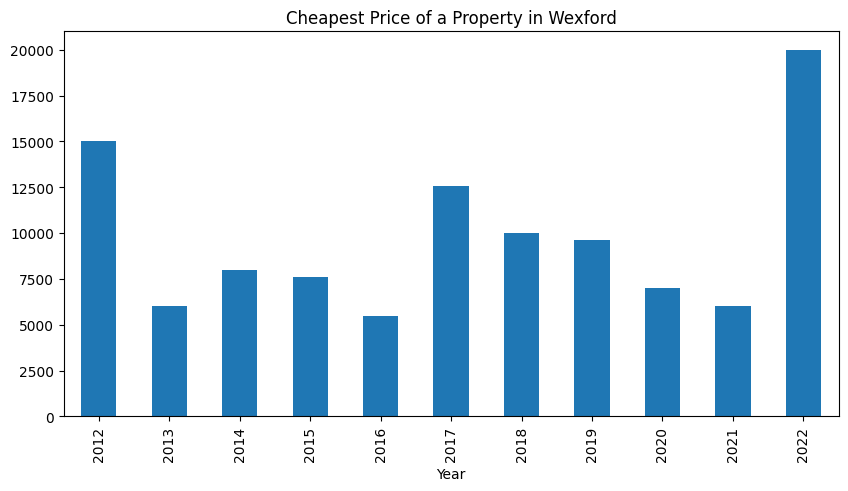

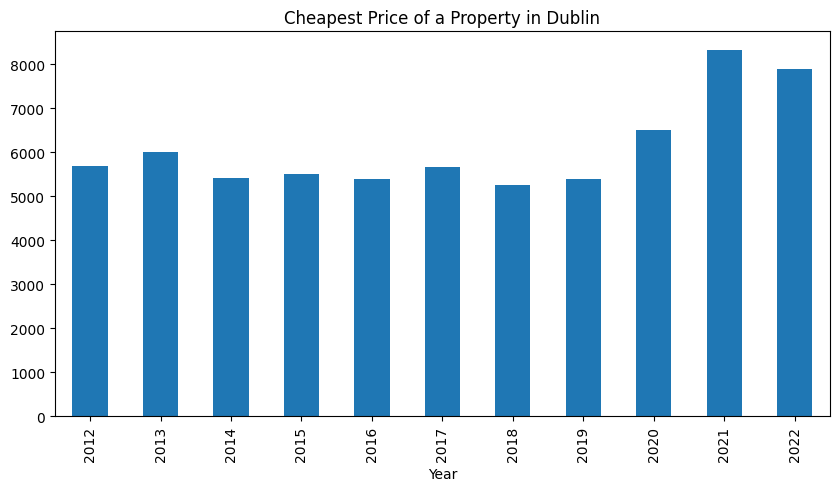

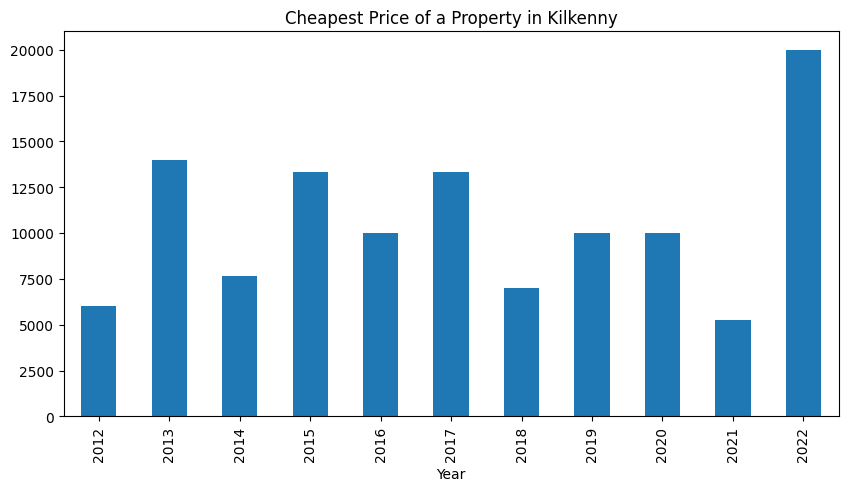

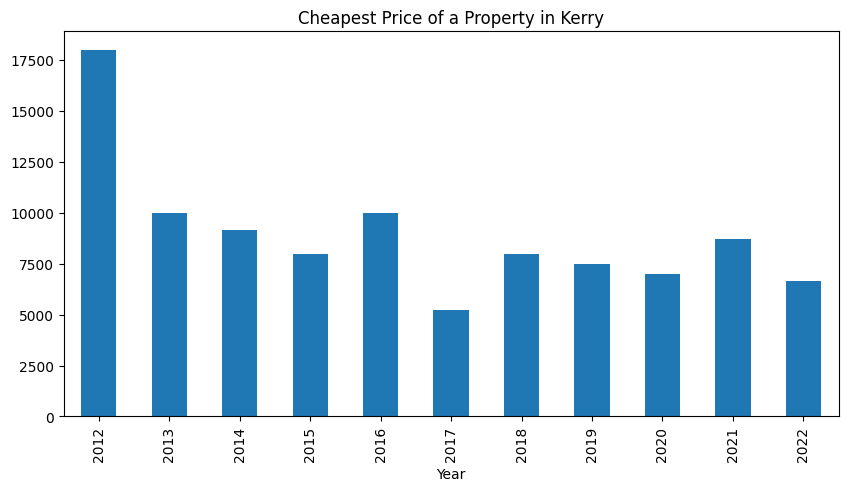

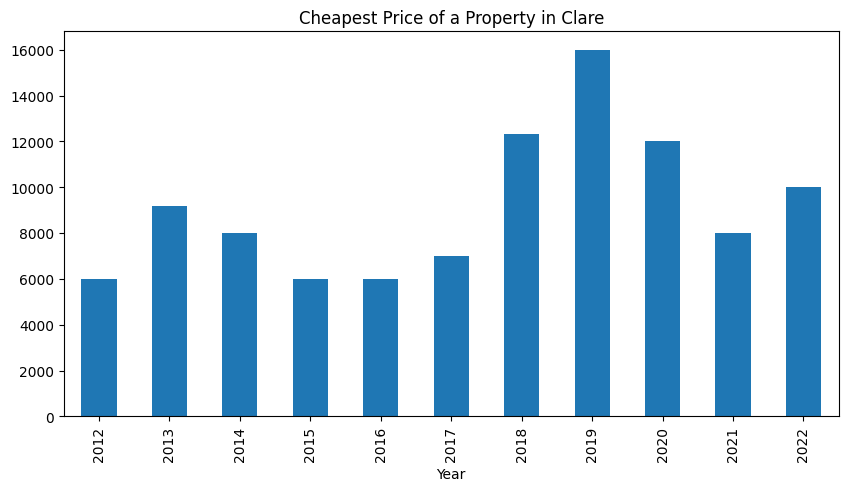

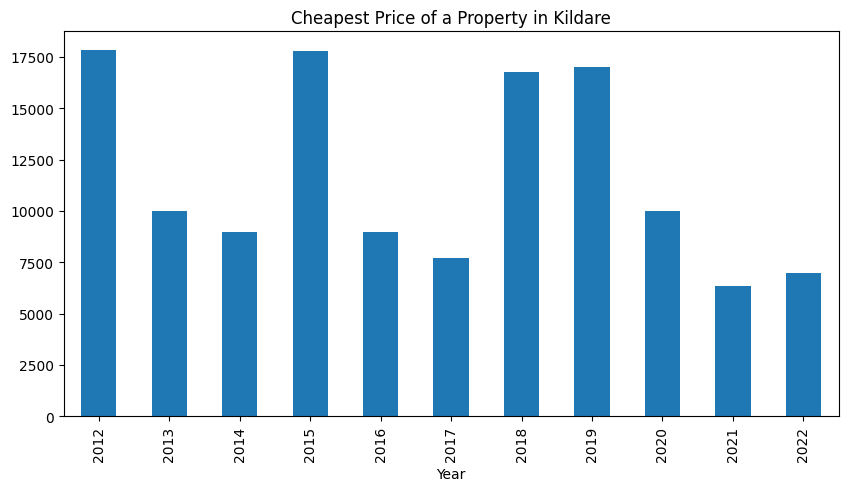

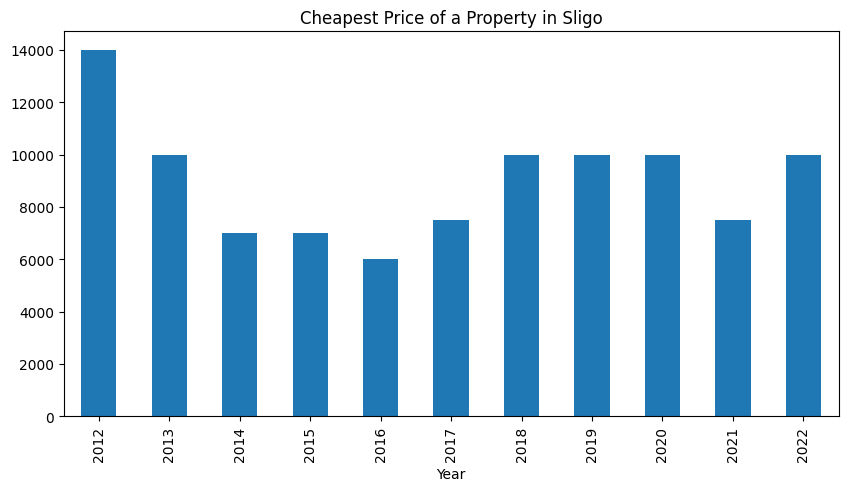

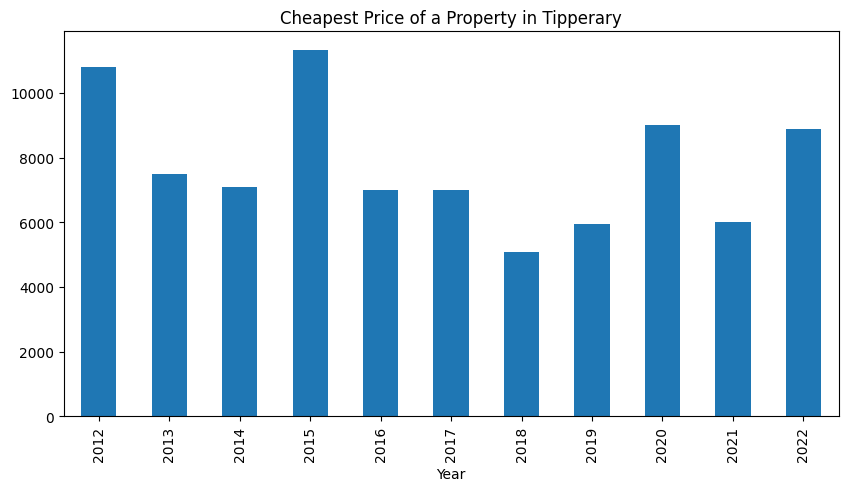

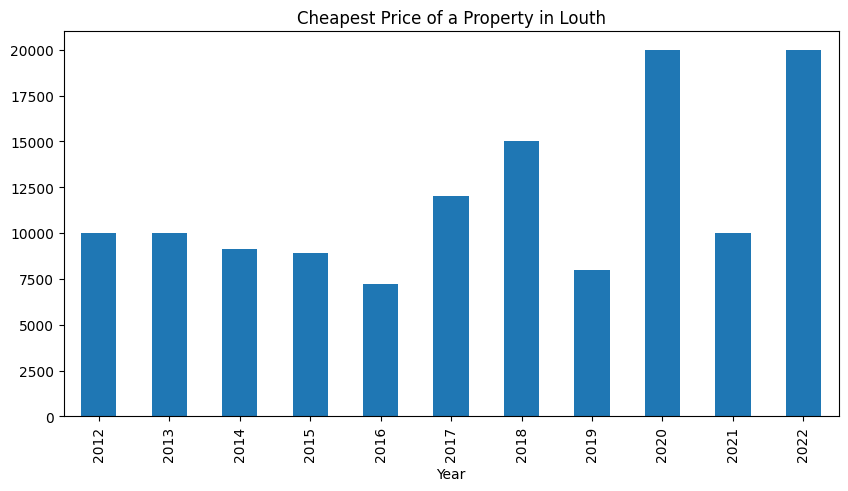

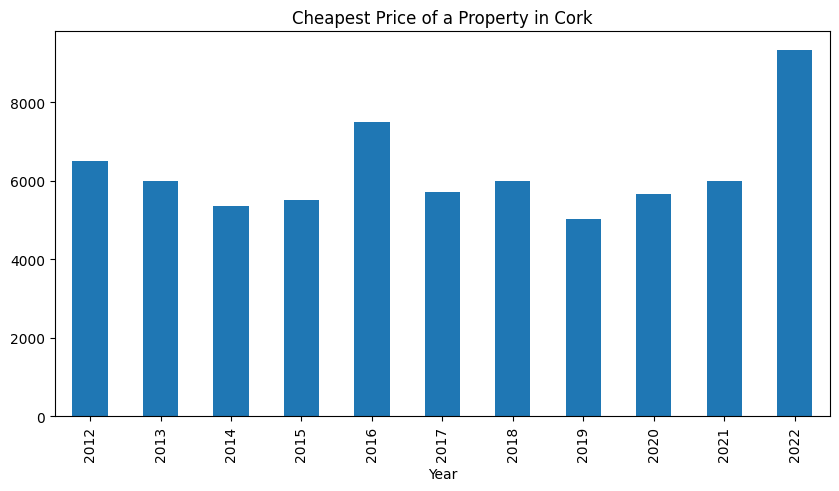

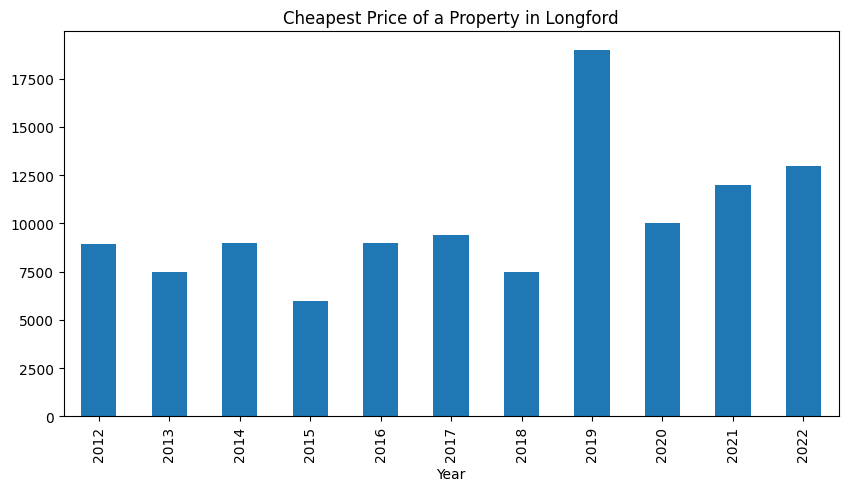

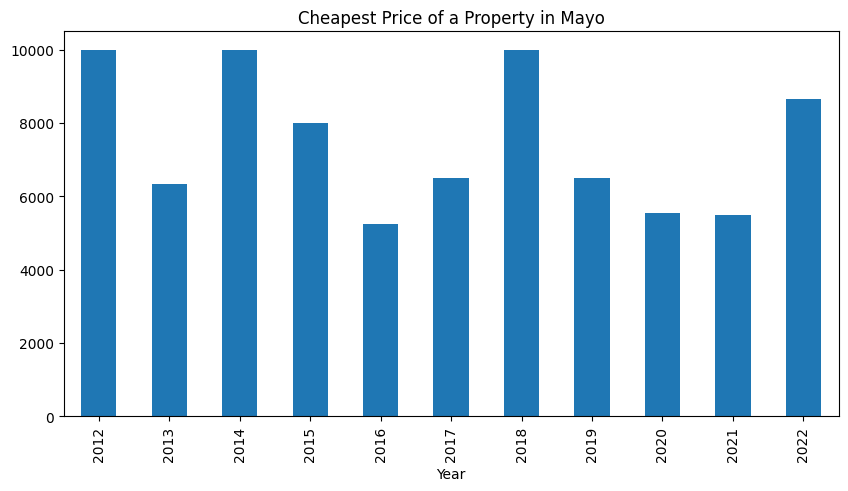

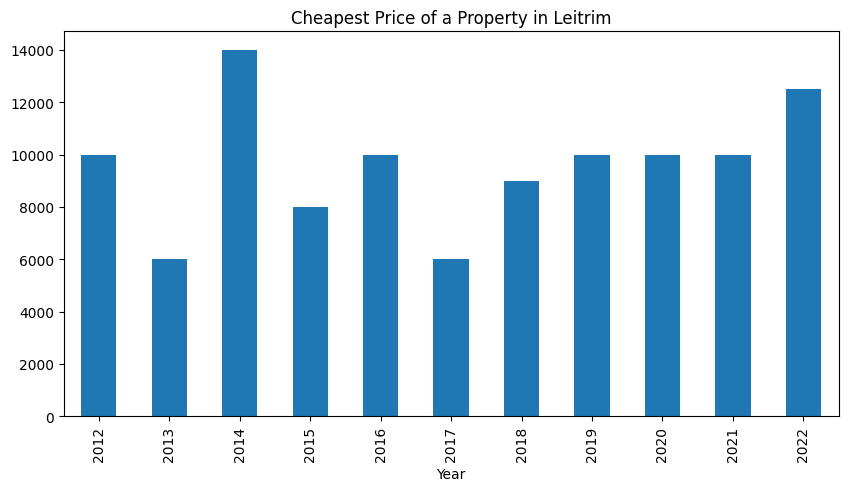

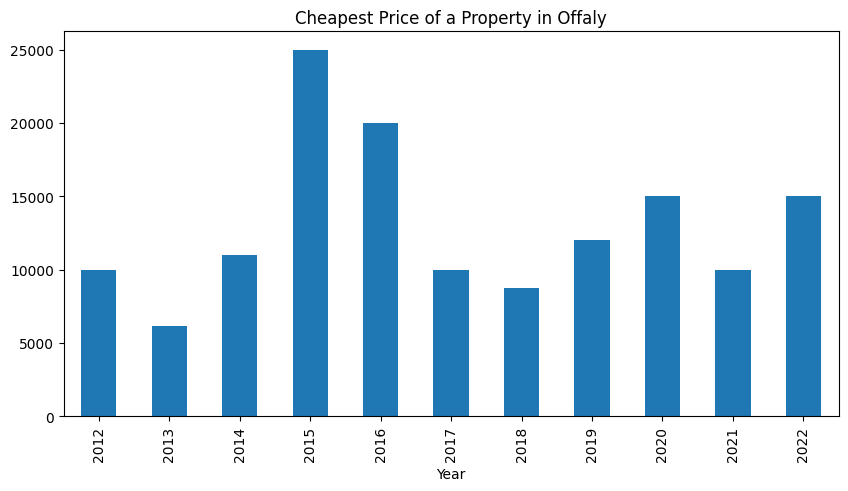

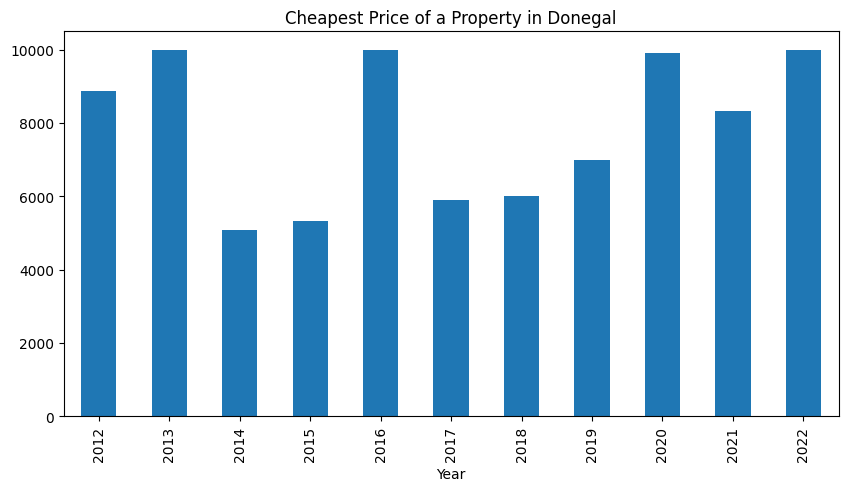

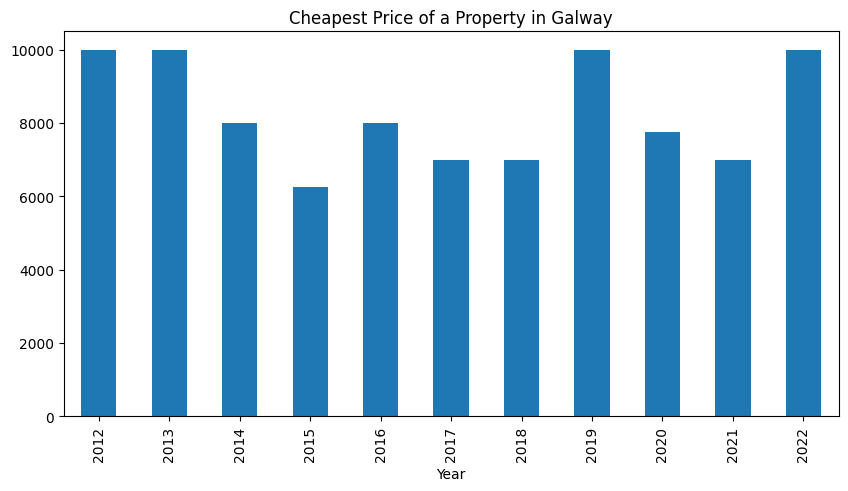

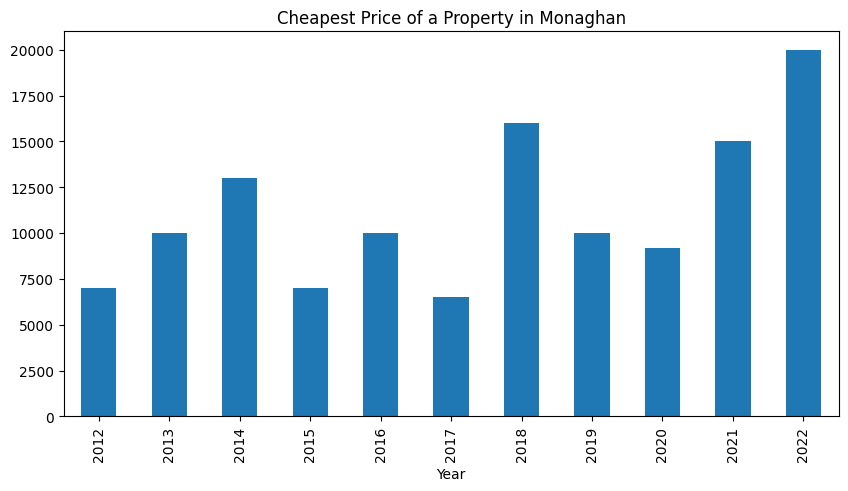

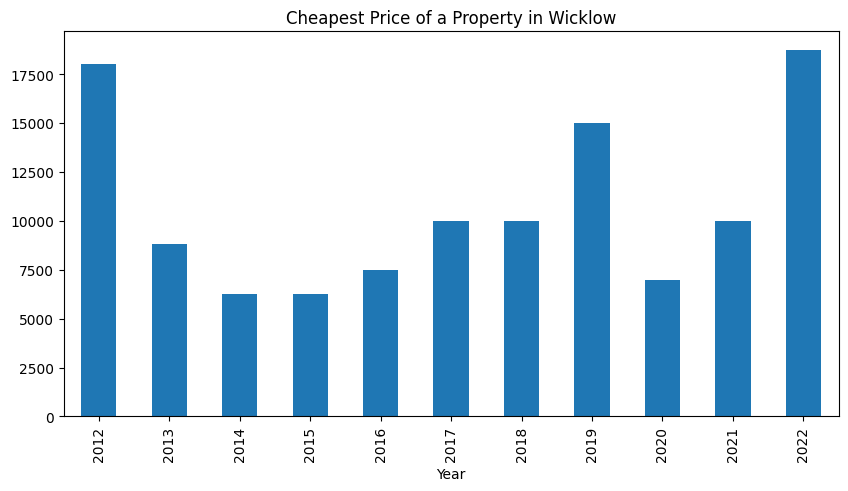

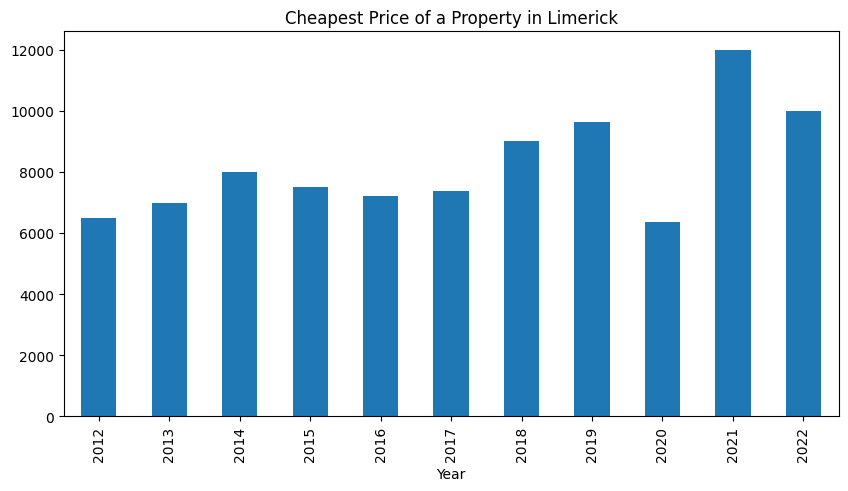

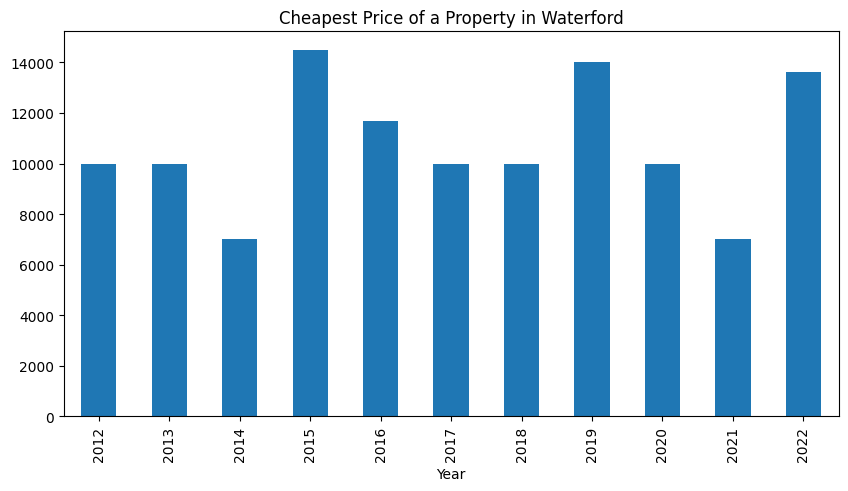

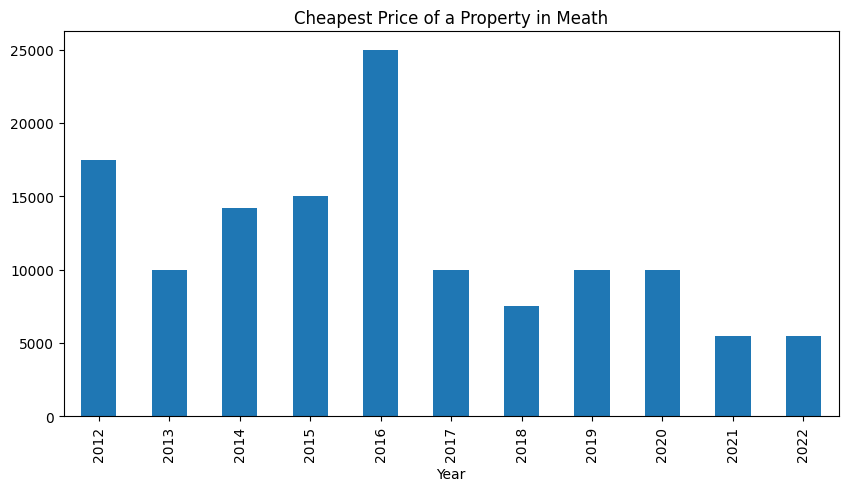

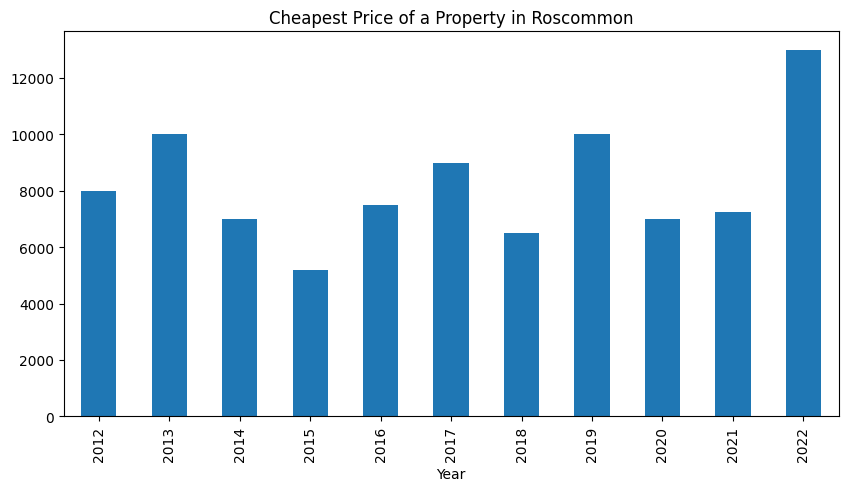

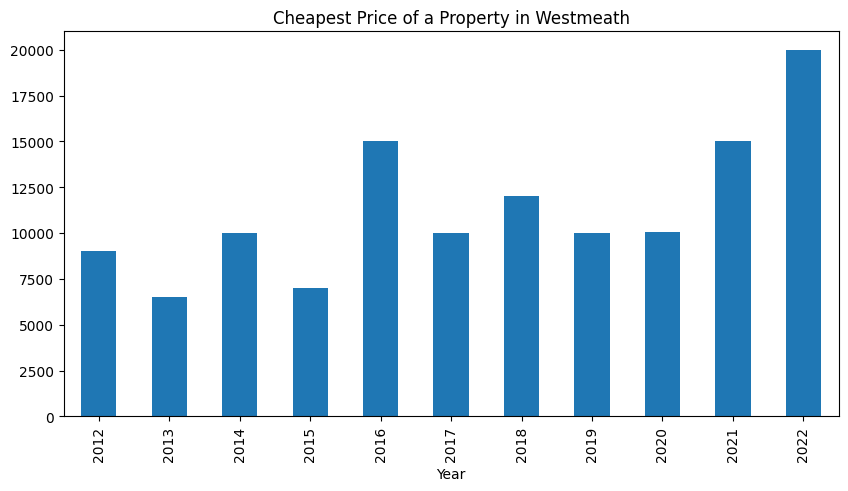

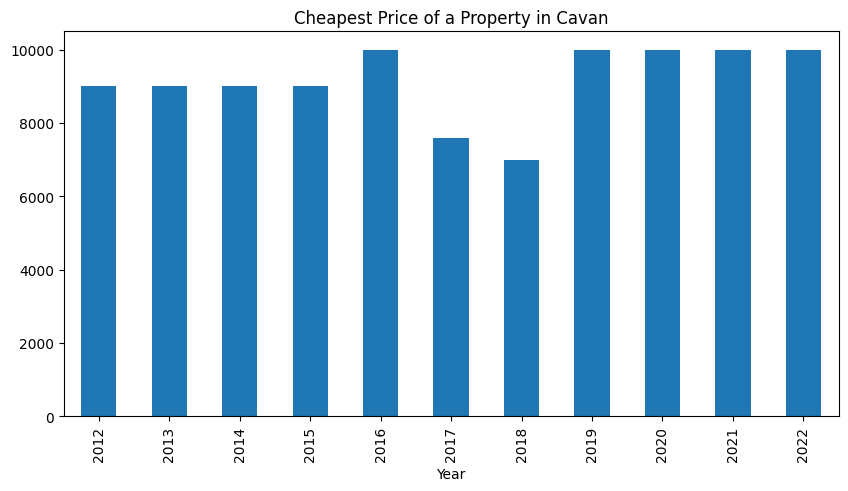

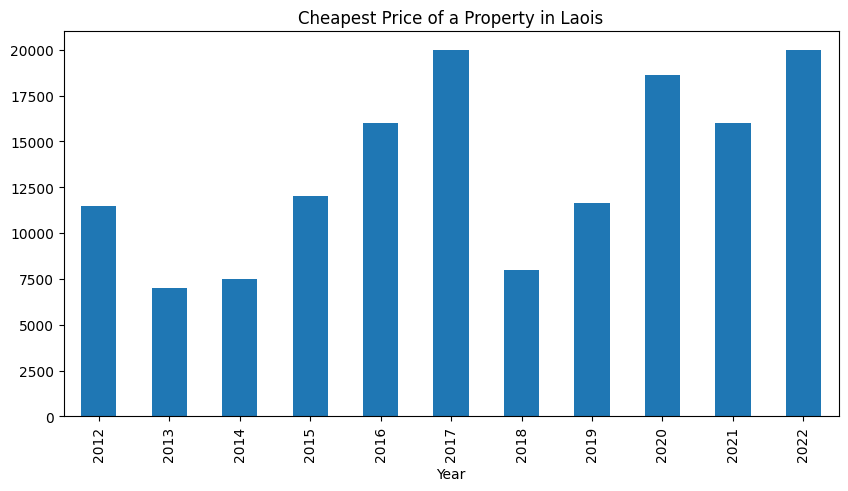

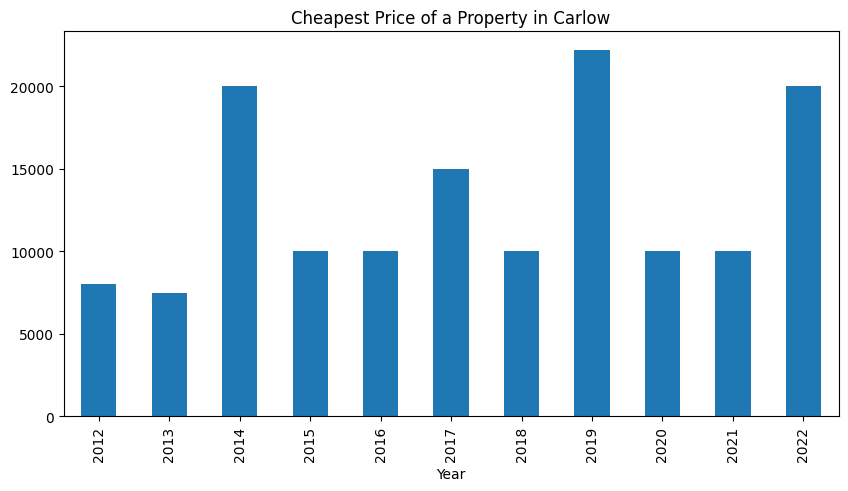

In [32]:
# Loop through each county and plot the cheapest price of a property in each year for that county draw a new graph for each county in the dataset.

for county in df['County'].unique():
    df[df['County'] == county].groupby('Year')['Price'].min().plot(
        kind='bar', title='Cheapest Price of a Property in {}'.format(county), figsize=(10, 5))
    plt.show()


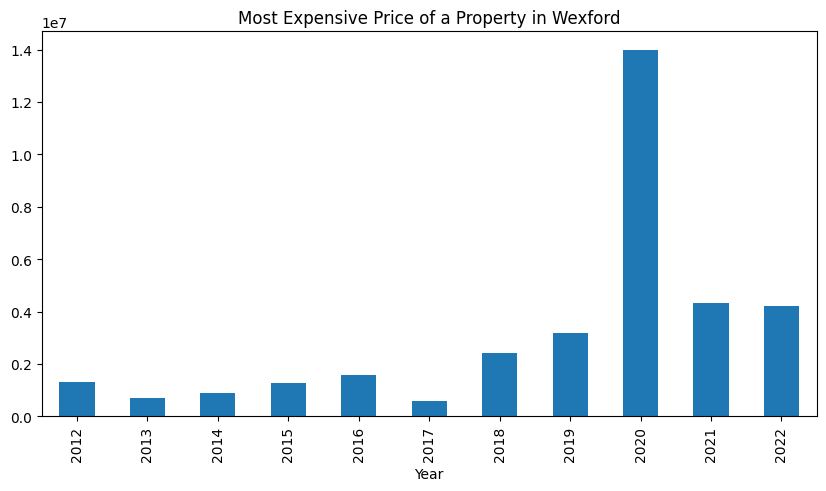

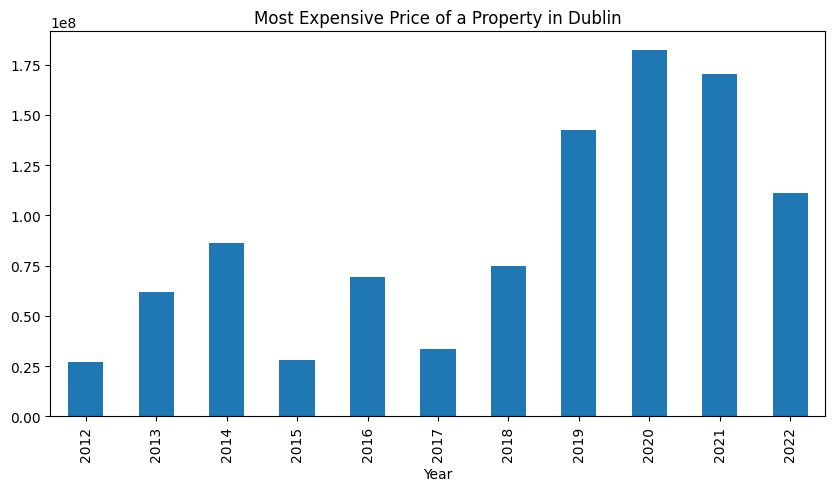

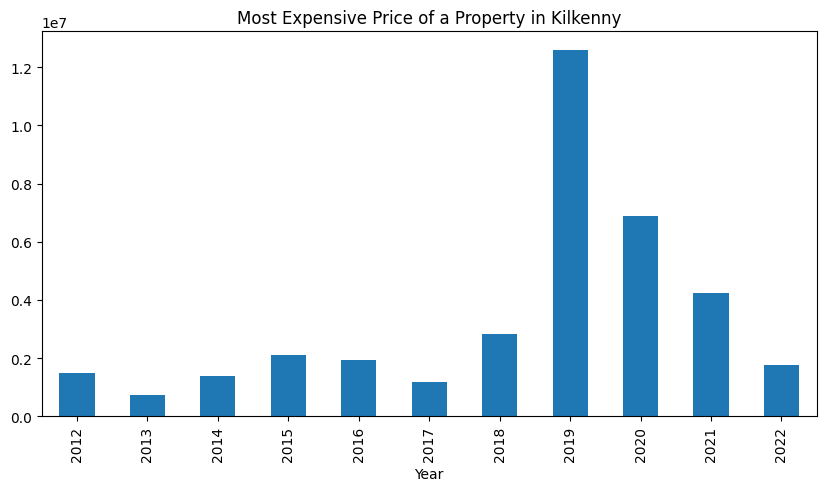

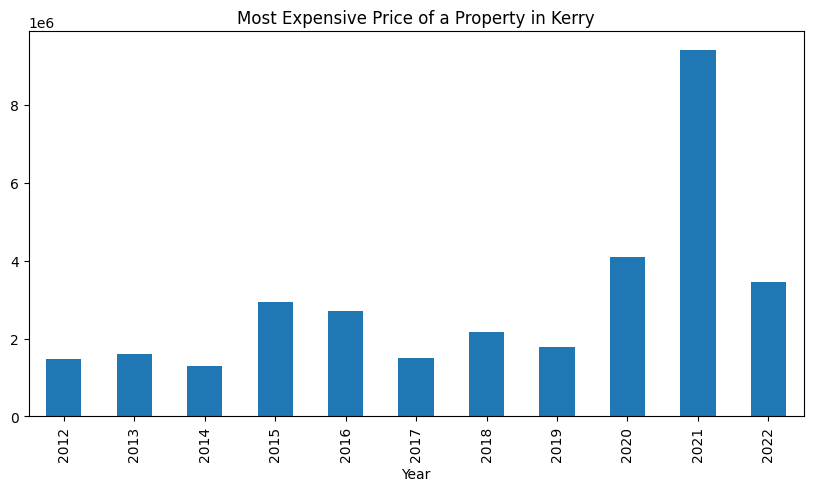

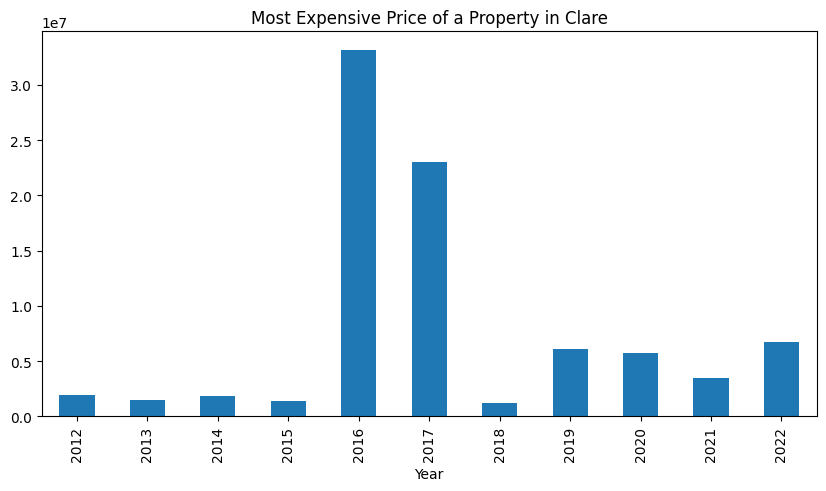

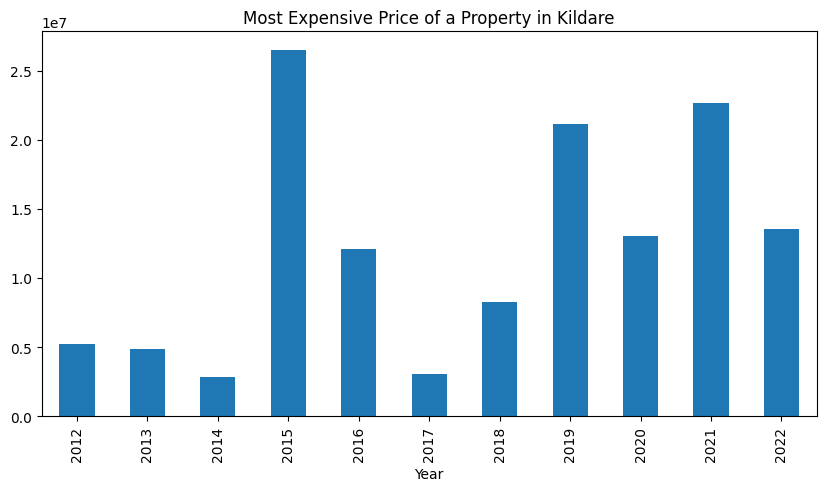

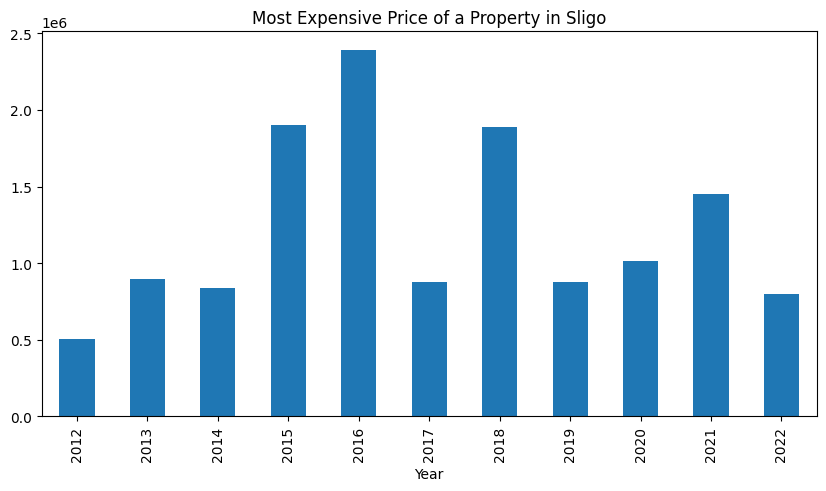

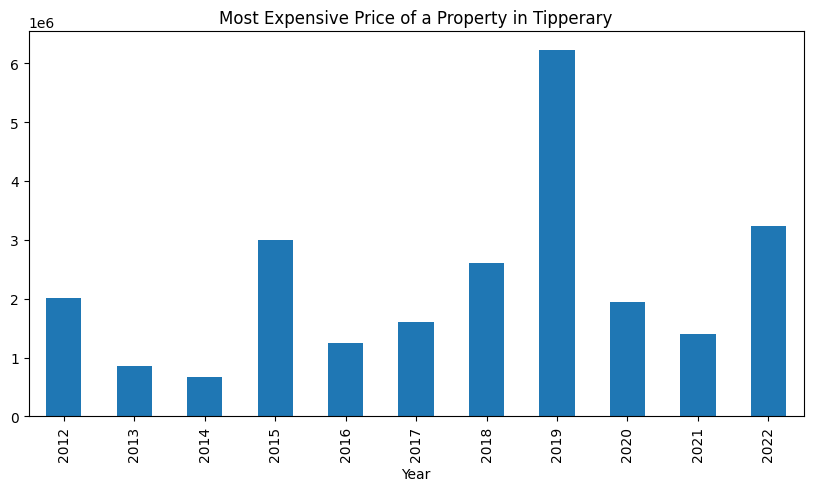

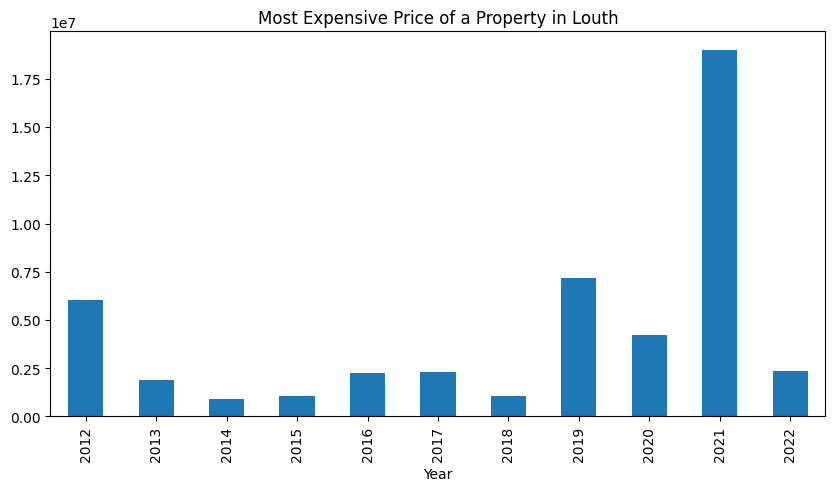

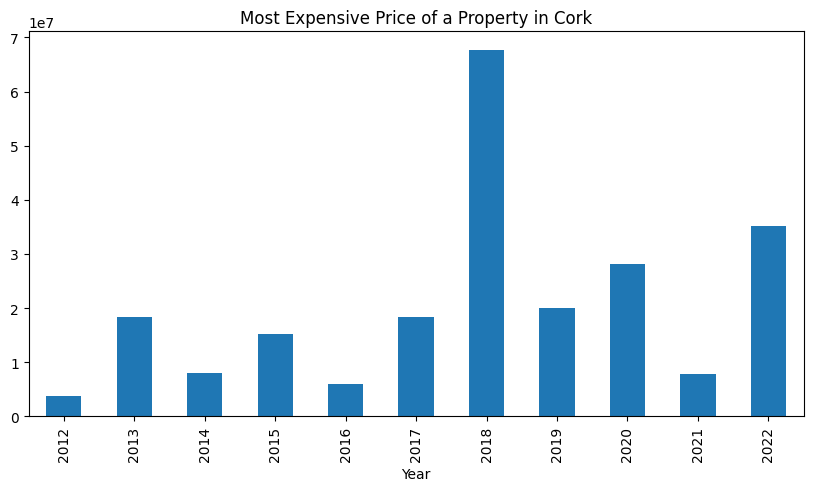

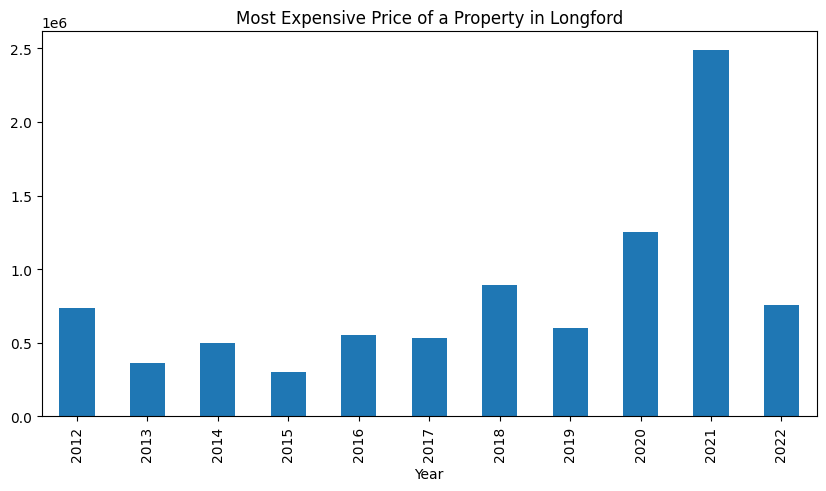

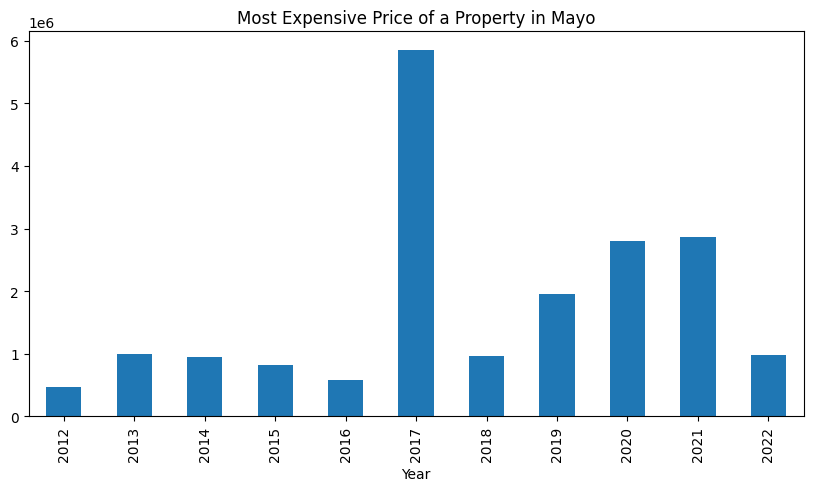

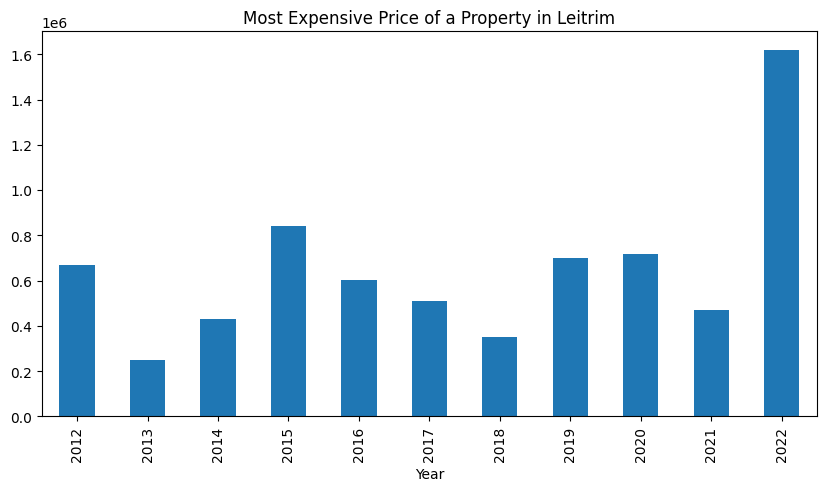

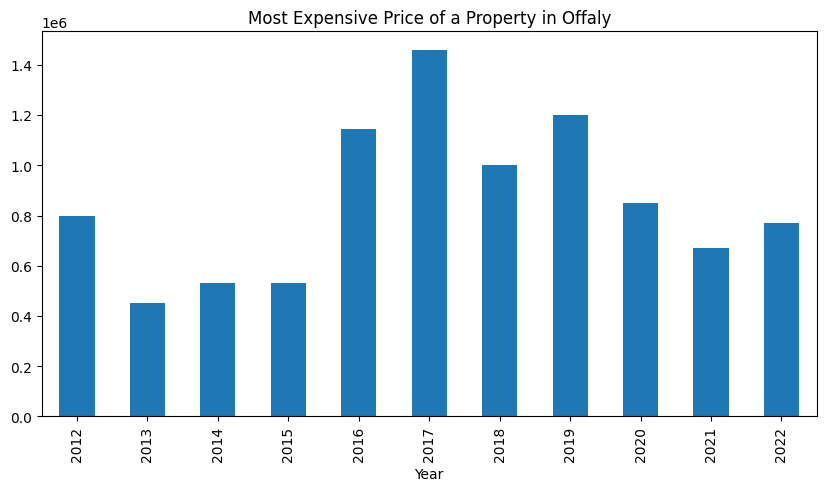

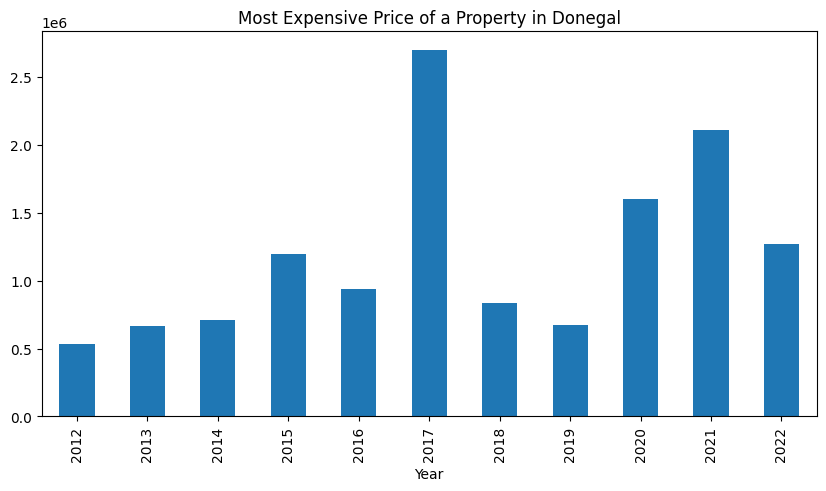

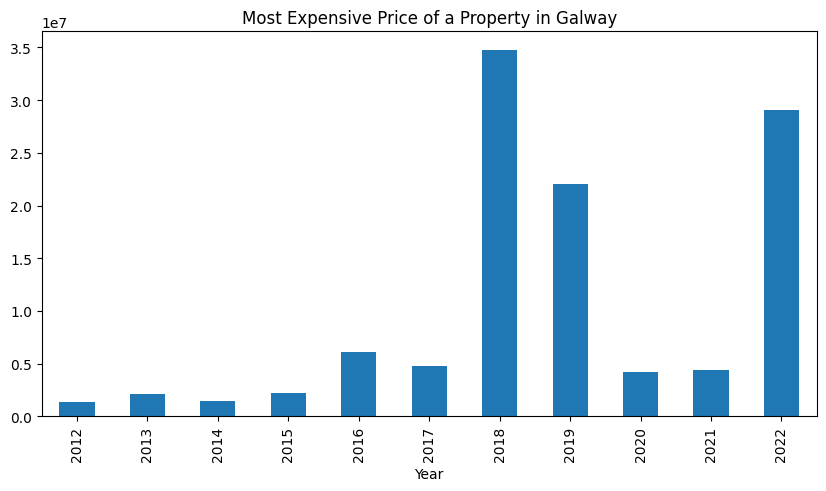

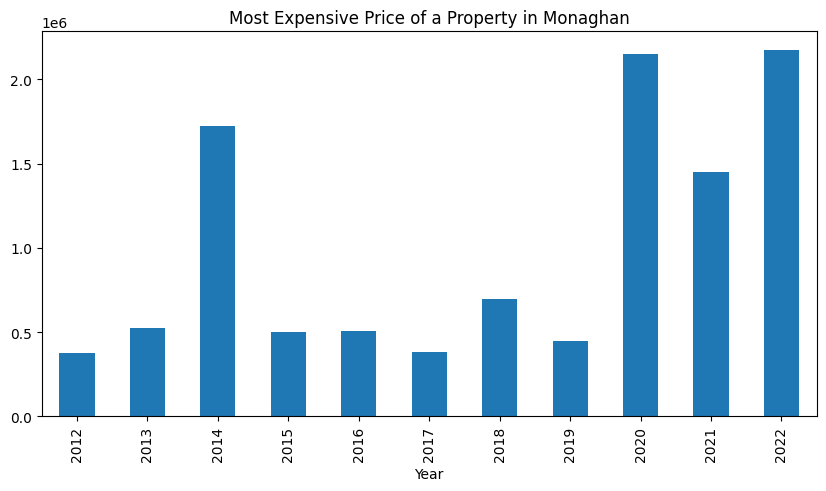

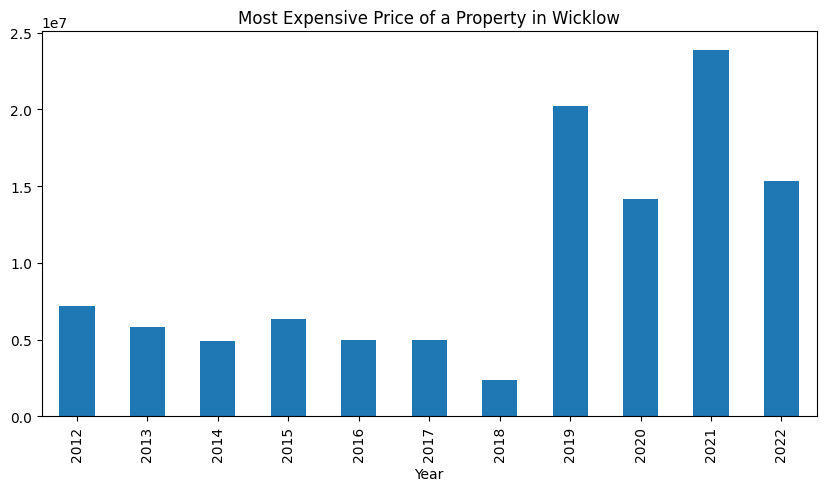

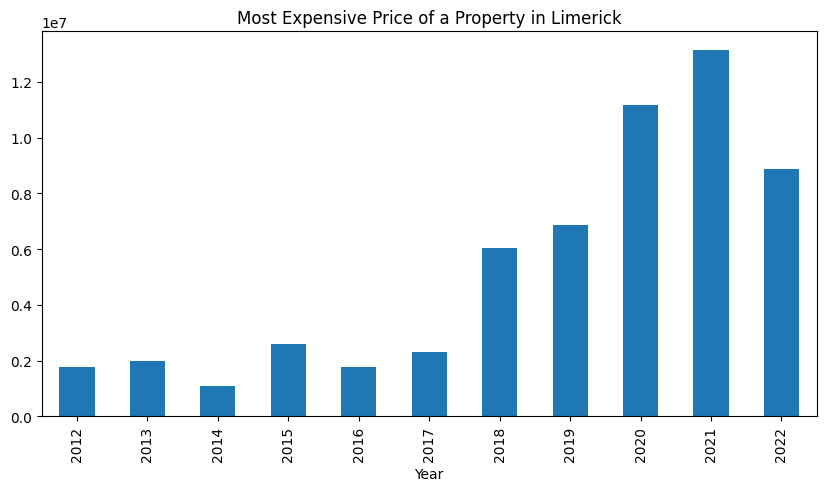

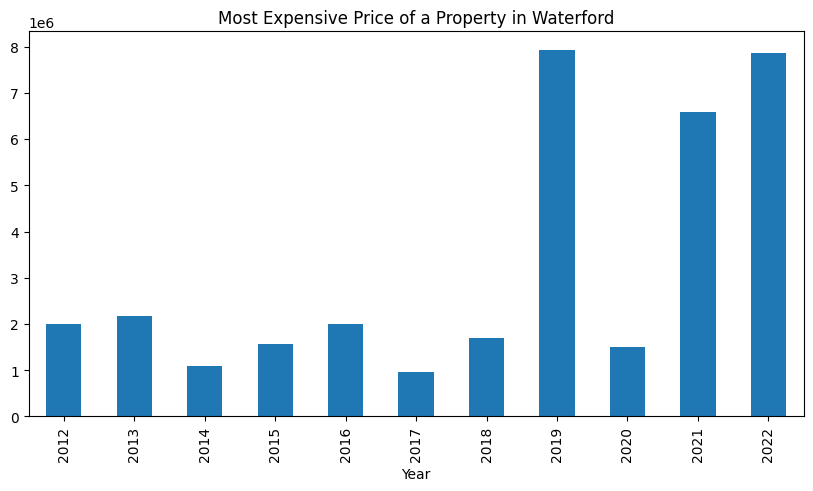

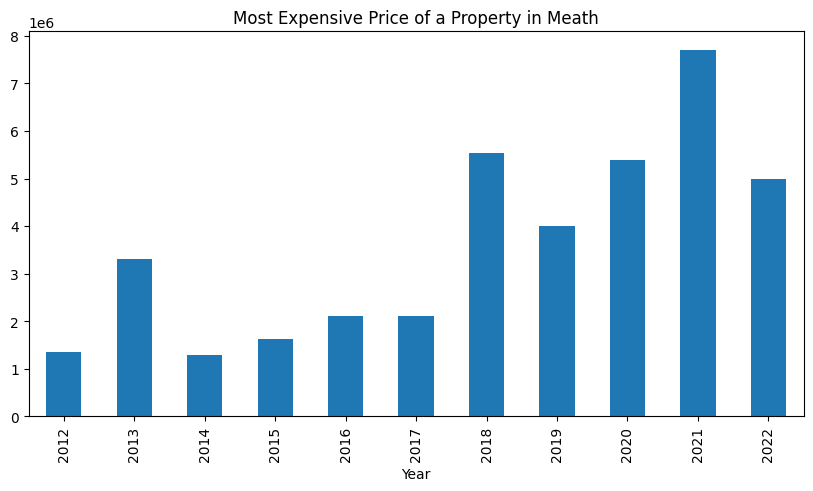

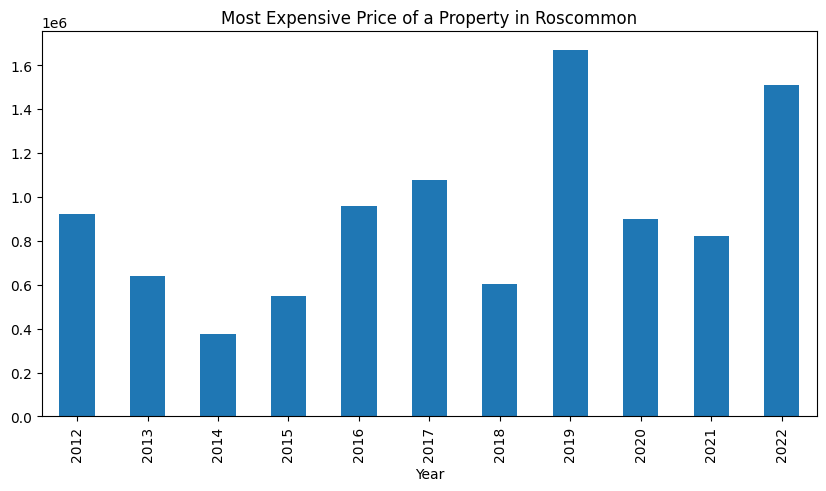

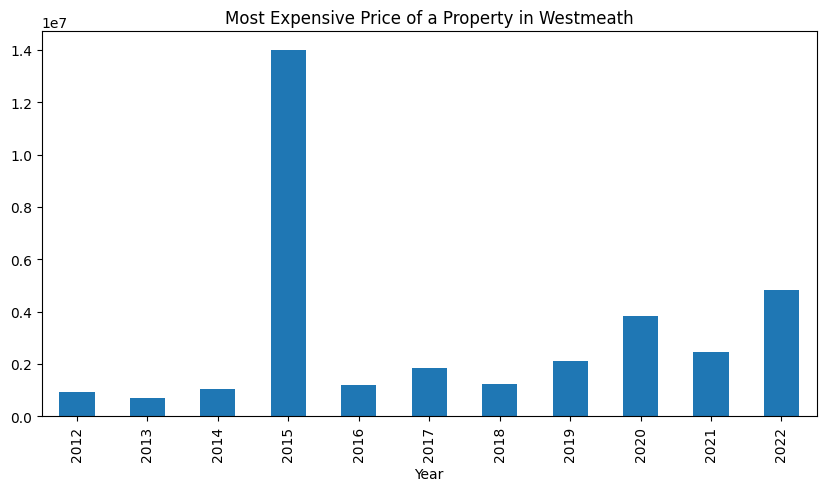

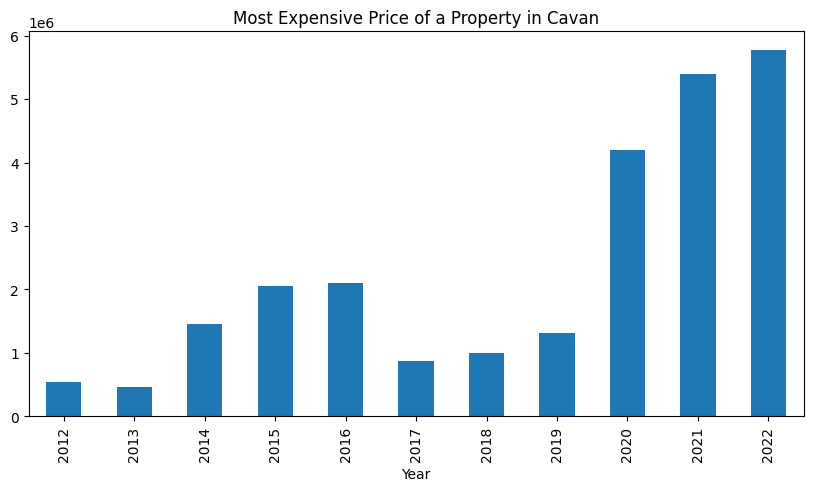

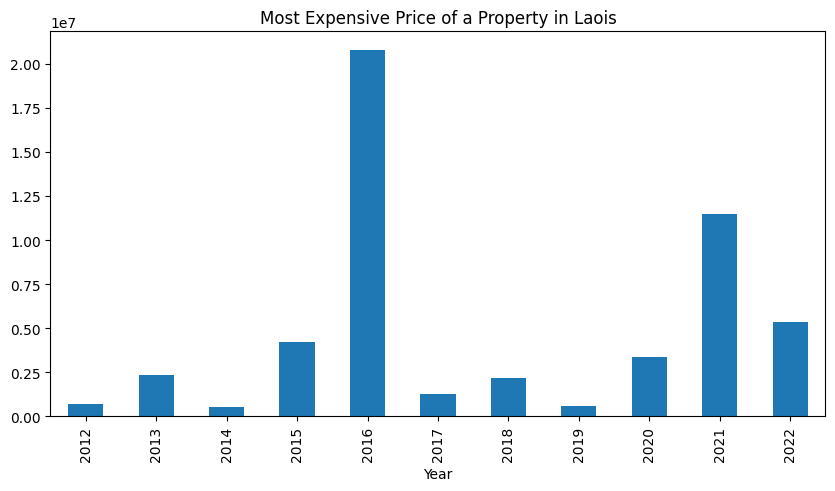

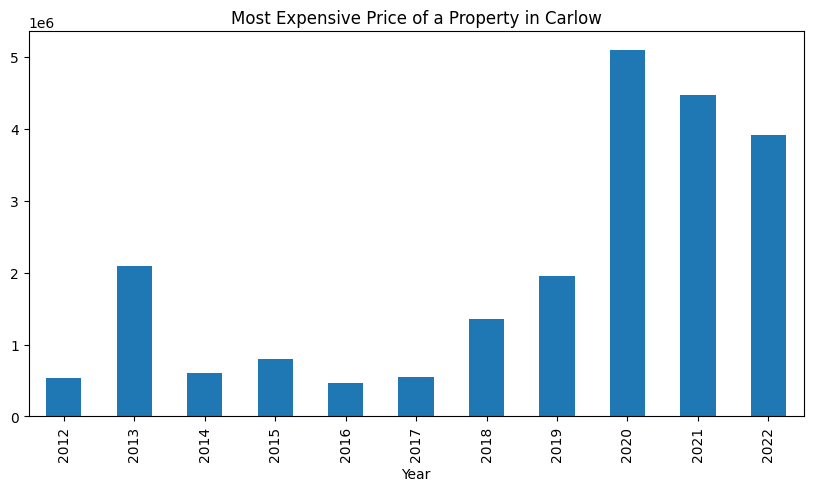

In [33]:
# Loop through each county and plot the most expensive price of a property in each year for that county draw a new graph for each county in the dataset show prices in millions.

for county in df['County'].unique():
    df[df['County'] == county].groupby('Year')['Price'].max().plot(
        kind='bar', title='Most Expensive Price of a Property in {}'.format(county), figsize=(10, 5))
    plt.show()
